In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

In [2]:
#import data
train_id = pd.read_csv('creditcard_dataset2.csv/train_identity.csv')
train_trans = pd.read_csv('creditcard_dataset2.csv/train_transaction.csv')

In [3]:
#Merge Transaction and Identity table
train_full = train_trans.merge(train_id, how='left', on='TransactionID') 

## Analysis of Data

In [64]:
print(train_id.shape)
print(train_trans.shape)
print(train_full.shape)

(144233, 41)
(590540, 394)
(590540, 435)


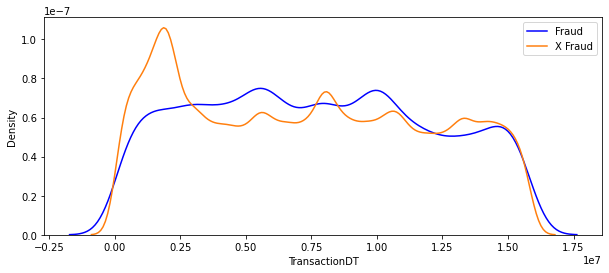

In [5]:
plt.figure(figsize=(10, 4))
sb.kdeplot(train_trans[train_trans['isFraud']==1]['TransactionDT'], label='Fraud', color = 'blue');
sb.kdeplot(train_trans[train_trans['isFraud']==0]['TransactionDT'], label='X Fraud', color = 'tab:orange');
plt.xlabel("TransactionDT", fontsize=10)
plt.legend()
plt.show()

In [6]:
def col_percentage(col):
    df_col_percent = (train_full.groupby(['isFraud'])[col]
         .value_counts(normalize=True)
         .rename('percentage')
         .mul(100)
         .reset_index()
         .sort_values(col))
    return df_col_percent

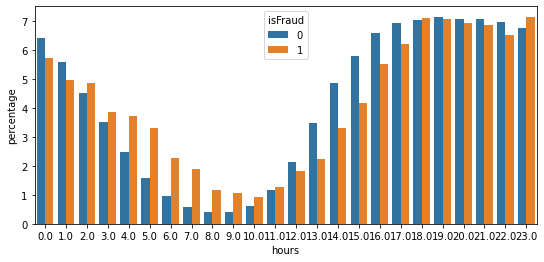

In [7]:
def transform_hour(df, col='TransactionDT'):
    hours = df[col] / (3600)        
    hours = np.floor(hours) % 24
    return hours
train_full['hours'] = transform_hour(train_trans)
df_hour = col_percentage('hours')
plt.figure(figsize=(9,4))
sb.barplot(x='hours',y='percentage',hue='isFraud',data=df_hour)
plt.show()

C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


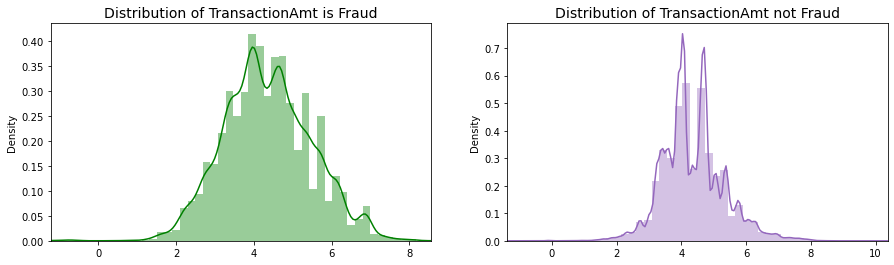

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15,4))

amt_fraud = train_trans.loc[train_trans['isFraud'] == 1]['TransactionAmt'].values

sb.distplot(np.log(amt_fraud), ax=ax[0], color='green')
ax[0].set_title('Distribution of TransactionAmt is Fraud', fontsize=14)
ax[0].set_xlim([min(np.log(amt_fraud)), max(np.log(amt_fraud))])

amt_nonfraud = train_trans.loc[train_trans['isFraud'] == 0]['TransactionAmt'].values

sb.distplot(np.log(amt_nonfraud), ax=ax[1], color='tab:purple')
ax[1].set_title('Distribution of TransactionAmt not Fraud', fontsize=14)
ax[1].set_xlim([min(np.log(amt_nonfraud)), max(np.log(amt_nonfraud))])

plt.show()

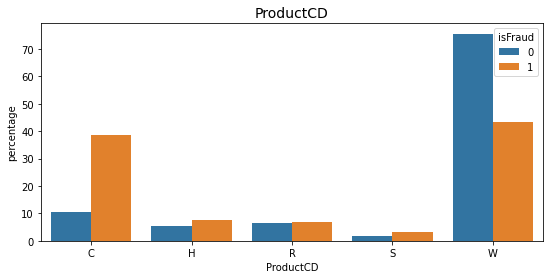

In [9]:
df_PCD = col_percentage('ProductCD')
plt.figure(figsize=(9,4))
sb.barplot(x='ProductCD',y='percentage',hue='isFraud',data=df_PCD)
plt.title('ProductCD', fontsize=14)
plt.show()

<Figure size 432x288 with 0 Axes>

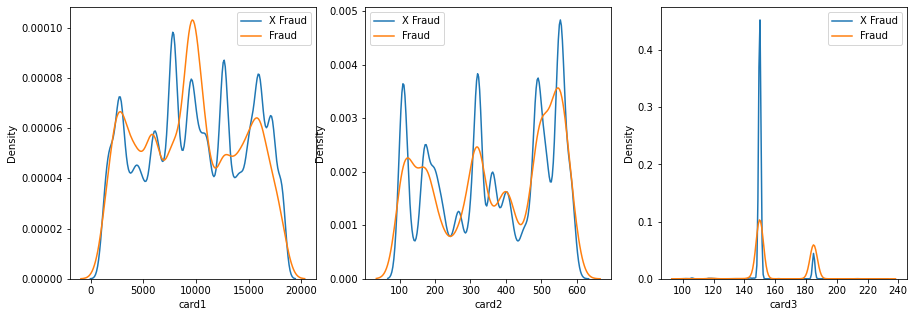

In [10]:
col = ['card1', 'card2', 'card3']
c0 = train_trans.loc[train_trans["isFraud"] == 0]
c1 = train_trans.loc[train_trans["isFraud"] == 1]
x = 0
plt.figure()
plt.subplots(1,3,figsize=(15,5))

for feature in col:
    x += 1
    plt.subplot(1,3,x)
    sb.kdeplot(data = c0[feature], label = "X Fraud")
    sb.kdeplot(data = c1[feature], label = "Fraud")
    plt.xlabel(feature, fontsize=10)
    plt.legend()
plt.show()

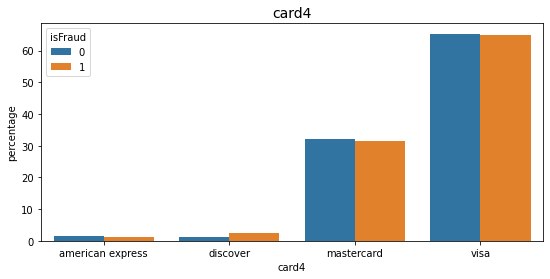

In [11]:
df_card4 = col_percentage('card4')
plt.figure(figsize=(9,4))
sb.barplot(x='card4',y='percentage',hue='isFraud',data=df_card4)
plt.title('card4', fontsize=14)
plt.show()

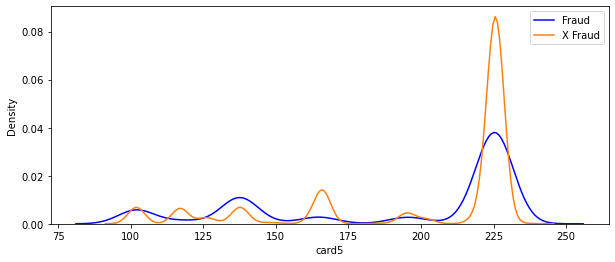

In [12]:
plt.figure(figsize=(10, 4))
sb.kdeplot(train_trans[train_trans['isFraud']==1]['card5'], label='Fraud', color = 'blue');
sb.kdeplot(train_trans[train_trans['isFraud']==0]['card5'], label='X Fraud', color = 'tab:orange');
plt.xlabel("card5", fontsize=10)
plt.legend()
plt.show()

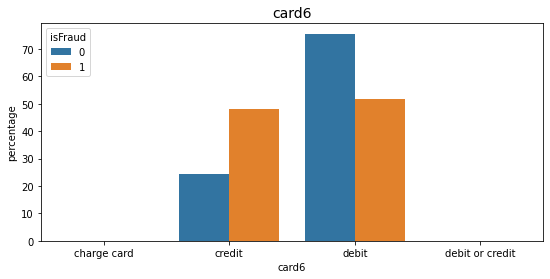

In [13]:
df_card6 = col_percentage('card6')
plt.figure(figsize=(9,4))
sb.barplot(x='card6',y='percentage',hue='isFraud',data=df_card6)
plt.title('card6', fontsize=14)
plt.show()

<Figure size 432x288 with 0 Axes>

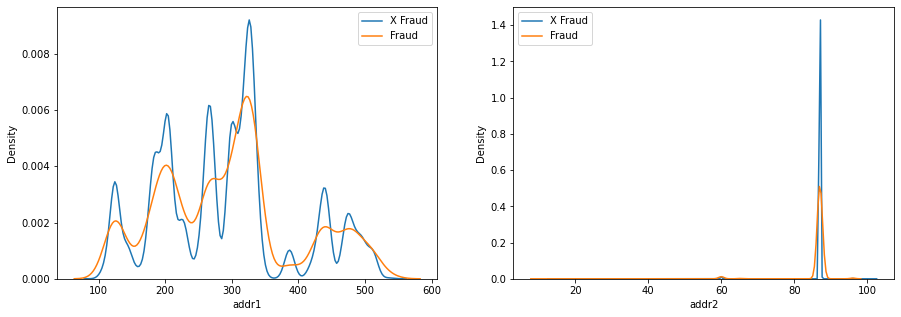

In [14]:
col = ['addr1', 'addr2']
c0 = train_trans.loc[train_trans["isFraud"] == 0]
c1 = train_trans.loc[train_trans["isFraud"] == 1]
x = 0
plt.figure()
plt.subplots(1,2,figsize=(15,5))

for feature in col:
    x += 1
    plt.subplot(1,2,x)
    sb.kdeplot(data = c0[feature], label = "X Fraud")
    sb.kdeplot(data = c1[feature], label = "Fraud")
    plt.xlabel(feature, fontsize=10)
    plt.legend()
plt.show()

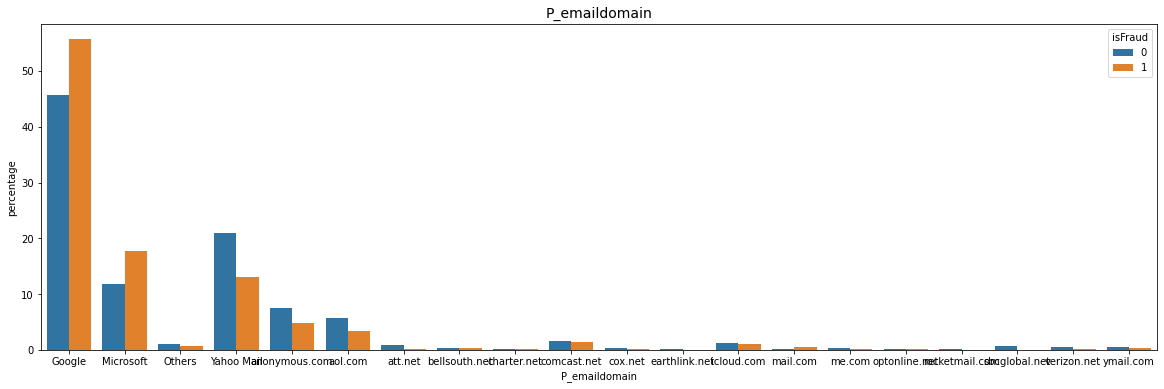

In [15]:
train_full.loc[train_full['P_emaildomain'].isin(['gmail.com', 'gmail']),'P_emaildomain'] = 'Google'

train_full.loc[train_full['P_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk',
                                         'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                         'yahoo.es']), 'P_emaildomain'] = 'Yahoo Mail'
train_full.loc[train_full['P_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 
                                         'hotmail.es','hotmail.co.uk', 'hotmail.de',
                                         'outlook.es', 'live.com', 'live.fr',
                                         'hotmail.fr']), 'P_emaildomain'] = 'Microsoft'
train_full.loc[train_full.P_emaildomain.isin(train_full.P_emaildomain\
                                         .value_counts()[train_full.P_emaildomain.value_counts() <= 500 ]\
                                         .index), 'P_emaildomain'] = "Others"
train_trans.P_emaildomain.fillna("NoInf", inplace=True)

df_pemail = col_percentage('P_emaildomain')
plt.figure(figsize=(20,6))
sb.barplot(x='P_emaildomain',y='percentage',hue='isFraud',data=df_pemail)
plt.title('P_emaildomain', fontsize=14)
plt.show()

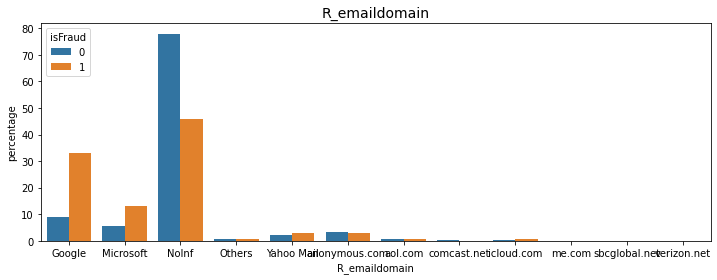

In [16]:
train_full.loc[train_full['R_emaildomain'].isin(['gmail.com', 'gmail']),'R_emaildomain'] = 'Google'

train_full.loc[train_full['R_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk',
                                         'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                         'yahoo.es']), 'R_emaildomain'] = 'Yahoo Mail'
train_full.loc[train_full['R_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 
                                         'hotmail.es','hotmail.co.uk', 'hotmail.de',
                                         'outlook.es', 'live.com', 'live.fr',
                                         'hotmail.fr']), 'R_emaildomain'] = 'Microsoft'
train_full.loc[train_full.R_emaildomain.isin(train_full.R_emaildomain\
                                         .value_counts()[train_full.R_emaildomain.value_counts() <= 500 ]\
                                         .index), 'R_emaildomain'] = "Others"
train_full.R_emaildomain.fillna("NoInf", inplace=True)


df_remail = col_percentage('R_emaildomain')
plt.figure(figsize=(12,4))
sb.barplot(x='R_emaildomain',y='percentage',hue='isFraud',data=df_remail)
plt.title('R_emaildomain', fontsize=14)
plt.show()

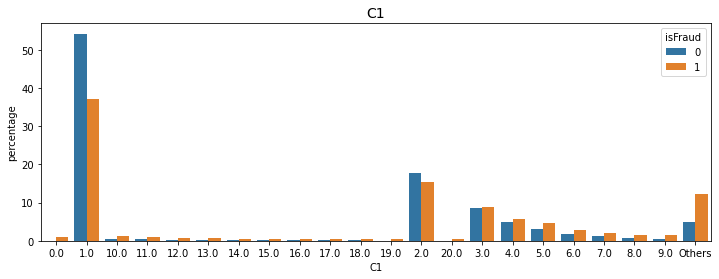

In [17]:
train_full.loc[train_full.C1.isin(train_full.C1\
                              .value_counts()[train_full.C1.value_counts() <= 400 ]\
                              .index), 'C1'] = "Others"

train_full['C1'] = train_full['C1'].astype(str)

df_C1 = col_percentage('C1')
plt.figure(figsize=(12,4))
sb.barplot(x='C1',y='percentage',hue='isFraud',data=df_C1)
plt.title('C1', fontsize=14)
plt.show()

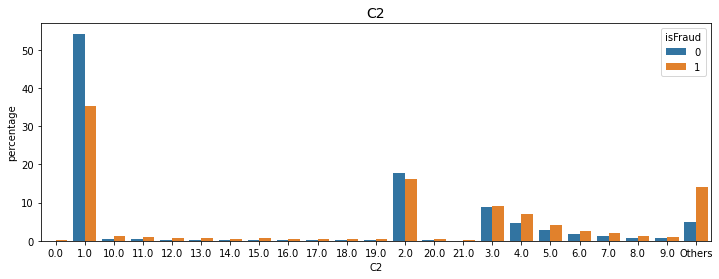

In [18]:
train_full.loc[train_full.C2.isin(train_full.C2\
                              .value_counts()[train_full.C2.value_counts() <= 400 ]\
                              .index), 'C2'] = "Others"

train_full['C2'] = train_full['C2'].astype(str)

df_C2 = col_percentage('C2')
plt.figure(figsize=(12,4))
sb.barplot(x='C2',y='percentage',hue='isFraud',data=df_C2)
plt.title('C2', fontsize=14)
plt.show()

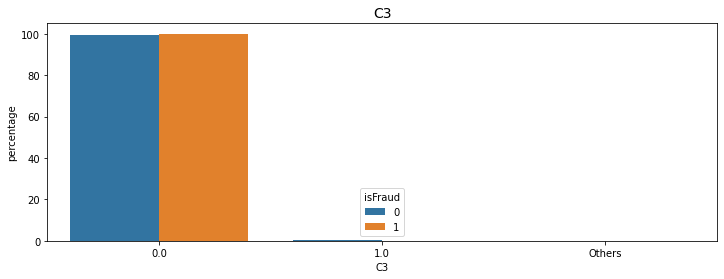

In [19]:
train_full.loc[train_full.C3.isin(train_full.C3\
                              .value_counts()[train_full.C3.value_counts() <= 400 ]\
                              .index), 'C3'] = "Others"

train_full['C3'] = train_full['C3'].astype(str)

df_C3 = col_percentage('C3')
plt.figure(figsize=(12,4))
sb.barplot(x='C3',y='percentage',hue='isFraud',data=df_C3)
plt.title('C3', fontsize=14)
plt.show()

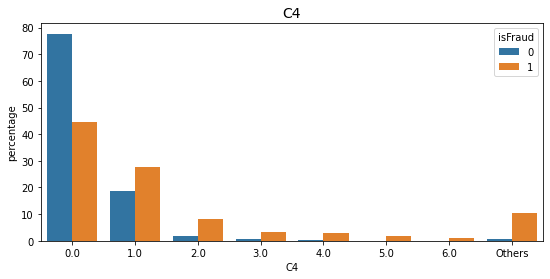

In [20]:
train_full.loc[train_full.C4.isin(train_full.C4\
                              .value_counts()[train_full.C4.value_counts() <= 400 ]\
                              .index), 'C4'] = 'Others'
train_full['C4'] = train_full['C4'].astype(str)
df_C4 = col_percentage('C4')
plt.figure(figsize=(9,4))
sb.barplot(x='C4',y='percentage',hue='isFraud',data=df_C4)
plt.title('C4', fontsize=14)
plt.show()

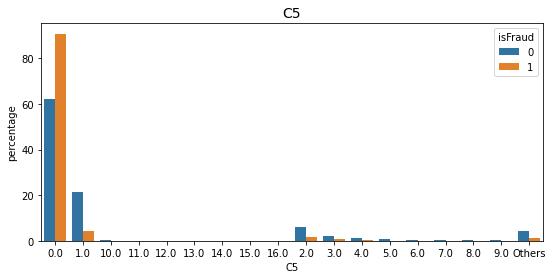

In [21]:
train_full.loc[train_full.C5.isin(train_full.C5\
                              .value_counts()[train_full.C5.value_counts() <= 400 ]\
                              .index), 'C5'] = 'Others'
train_full['C5'] = train_full['C5'].astype(str)

df_C5 = col_percentage('C5')
plt.figure(figsize=(9,4))
sb.barplot(x='C5',y='percentage',hue='isFraud',data=df_C5)
plt.title('C5', fontsize=14)
plt.show()

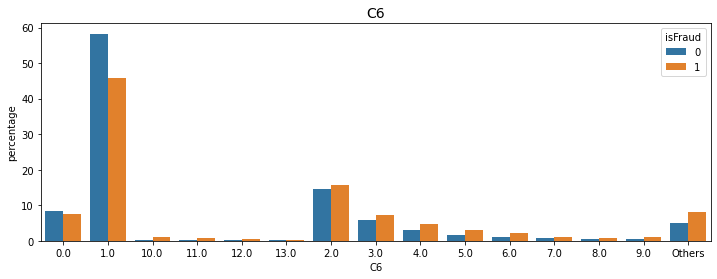

In [22]:
train_full.loc[train_full.C6.isin(train_full.C6\
                              .value_counts()[train_full.C6.value_counts() <= 600 ]\
                              .index), 'C6'] = "Others"
train_full['C6'] = train_full['C6'].astype(str)

df_C6 = col_percentage('C6')
plt.figure(figsize=(12,4))
sb.barplot(x='C6',y='percentage',hue='isFraud',data=df_C6)
plt.title('C6', fontsize=14)
plt.show()

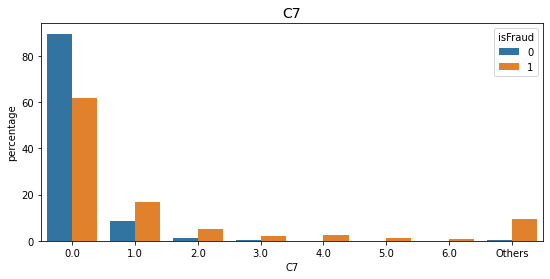

In [23]:
train_full.loc[train_full.C7.isin(train_full.C7\
                              .value_counts()[train_full.C7.value_counts() <= 400 ]\
                              .index), 'C7'] = "Others"
train_full['C7'] = train_full['C7'].astype(str)

df_C7 = col_percentage('C7')
plt.figure(figsize=(9,4))
sb.barplot(x='C7',y='percentage',hue='isFraud',data=df_C7)
plt.title('C7', fontsize=14)
plt.show()

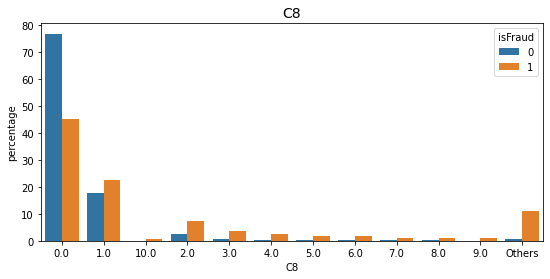

In [24]:
train_full.loc[train_full.C8.isin(train_full.C8\
                              .value_counts()[train_full.C8.value_counts() <= 400 ]\
                              .index), 'C8'] = "Others"
train_full['C8'] = train_full['C8'].astype(str)

df_C8 = col_percentage('C8')
plt.figure(figsize=(9,4))
sb.barplot(x='C8',y='percentage',hue='isFraud',data=df_C8)
plt.title('C8', fontsize=14)
plt.show()

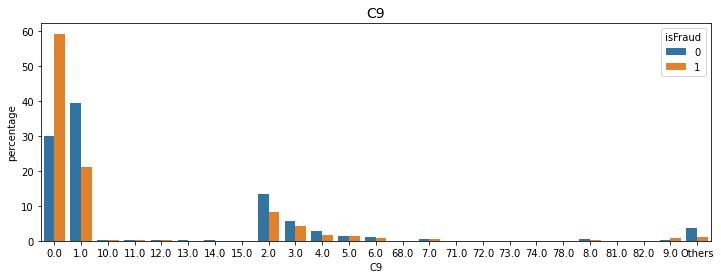

In [25]:
train_full.loc[train_full.C9.isin(train_full.C9\
                              .value_counts()[train_full.C9.value_counts() <= 400 ]\
                              .index), 'C9'] = "Others"
train_full['C9'] = train_full['C9'].astype(str)

df_C9 = col_percentage('C9')
plt.figure(figsize=(12,4))
sb.barplot(x='C9',y='percentage',hue='isFraud',data=df_C9)
plt.title('C9', fontsize=14)
plt.show()

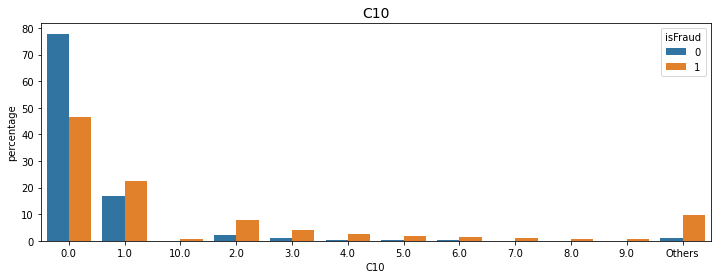

In [26]:
train_full.loc[train_full.C10.isin(train_full.C10\
                              .value_counts()[train_full.C10.value_counts() <= 400 ]\
                              .index), 'C10'] = "Others"
train_full['C10'] = train_full['C10'].astype(str)

df_C10 = col_percentage('C10')
plt.figure(figsize=(12,4))
sb.barplot(x='C10',y='percentage',hue='isFraud',data=df_C10)
plt.title('C10', fontsize=14)
plt.show()

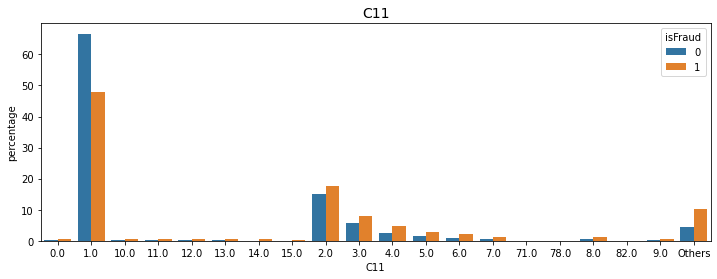

In [27]:
train_full.loc[train_full.C11.isin(train_full.C11\
                              .value_counts()[train_full.C11.value_counts() <= 400 ]\
                              .index), 'C11'] = "Others"
train_full['C11'] = train_full['C11'].astype(str)

df_C11 = col_percentage('C11')
plt.figure(figsize=(12,4))
sb.barplot(x='C11',y='percentage',hue='isFraud',data=df_C11)
plt.title('C11', fontsize=14)
plt.show()

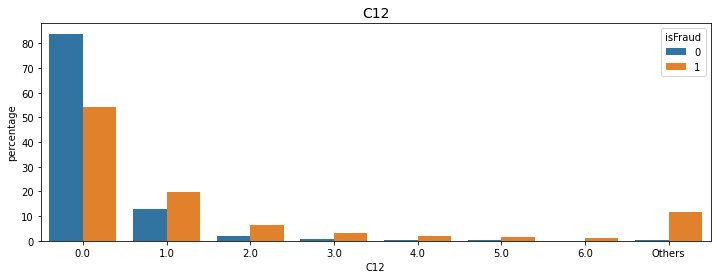

In [28]:
train_full.loc[train_full.C12.isin(train_full.C12\
                              .value_counts()[train_full.C12.value_counts() <= 400 ]\
                              .index), 'C12'] = "Others"
train_full['C12'] = train_full['C12'].astype(str)

df_C12 = col_percentage('C12')
plt.figure(figsize=(12,4))
sb.barplot(x='C12',y='percentage',hue='isFraud',data=df_C12)
plt.title('C12', fontsize=14)
plt.show()

Text(0.5, 1.0, 'C13 is Fraud')

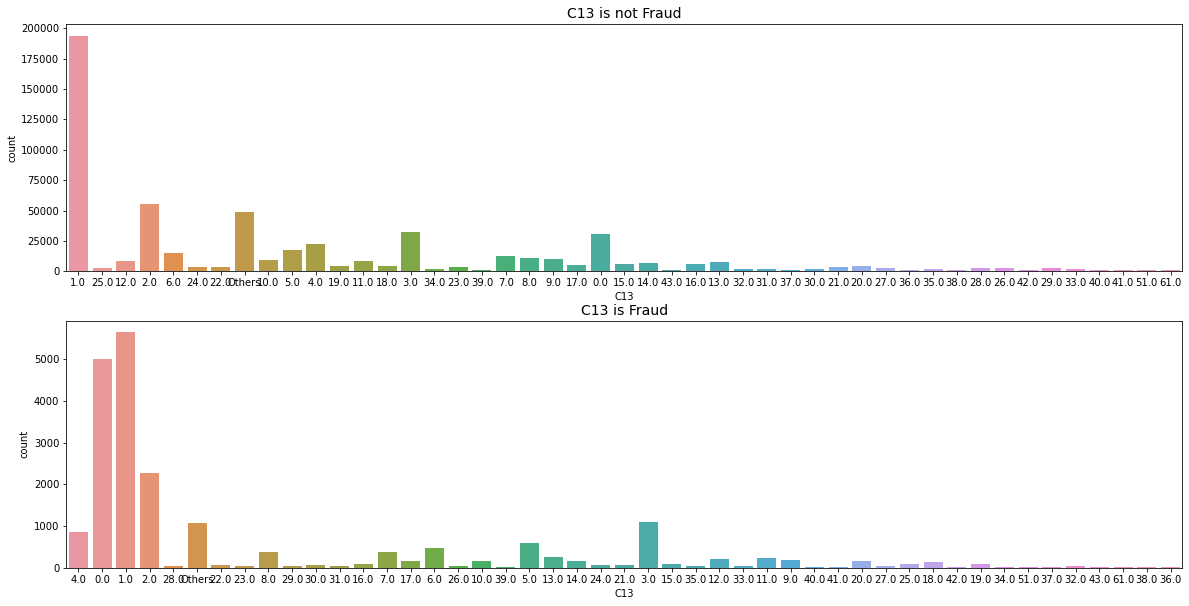

In [29]:
train_full.loc[train_full.C13.isin(train_full.C13\
                              .value_counts()[train_full.C13.value_counts() <= 1000 ]\
                              .index), 'C13'] = "Others"
fig, ax = plt.subplots(2, 1, figsize=(20,10))

sb.countplot(x="C13", ax=ax[0], data=train_full.loc[train_trans['isFraud'] == 0])
ax[0].set_title('C13 is not Fraud', fontsize=14)
sb.countplot(x="C13", ax=ax[1], data=train_full.loc[train_trans['isFraud'] == 1])
ax[1].set_title('C13 is Fraud', fontsize=14)

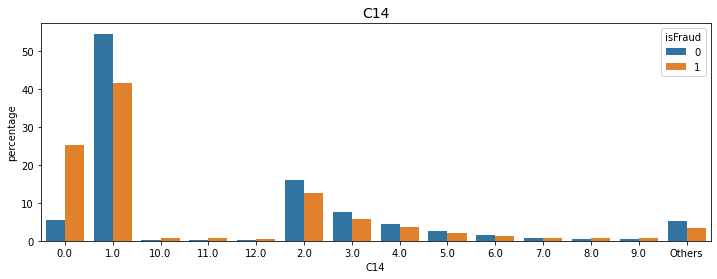

In [30]:
train_full.loc[train_full.C14.isin(train_full.C14\
                              .value_counts()[train_full.C14.value_counts() <= 1000 ]\
                              .index), 'C14'] = "Others"
train_full['C14'] = train_full['C14'].astype(str)

df_C14 = col_percentage('C14')
plt.figure(figsize=(12,4))
sb.barplot(x='C14',y='percentage',hue='isFraud',data=df_C14)
plt.title('C14', fontsize=14)
plt.show()

<Figure size 432x288 with 0 Axes>

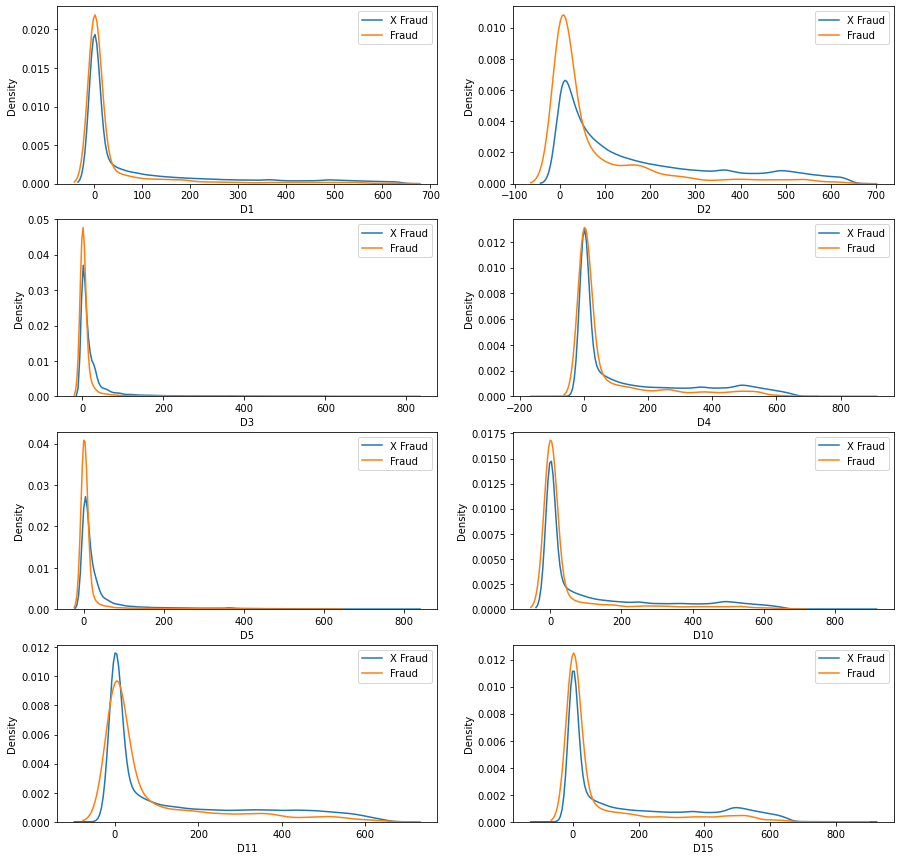

In [31]:
col = ['D1', 'D2', 'D3', 'D4', 'D5', 'D10', 'D11', 'D15']
c0 = train_trans.loc[train_trans["isFraud"] == 0]
c1 = train_trans.loc[train_trans["isFraud"] == 1]
x = 0
plt.figure()
plt.subplots(4,2,figsize=(15,15))

for feature in col:
    x += 1
    plt.subplot(4,2,x)
    sb.kdeplot(data = c0[feature], label = "X Fraud")
    sb.kdeplot(data = c1[feature], label = "Fraud")
    plt.xlabel(feature, fontsize=10)
    plt.legend()
plt.show()

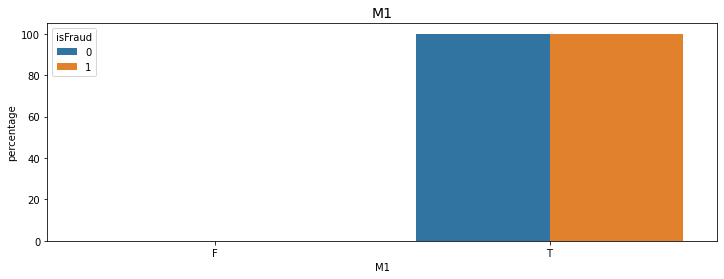

In [32]:
df_M1 = col_percentage('M1')
plt.figure(figsize=(12,4))
sb.barplot(x='M1',y='percentage',hue='isFraud',data=df_M1)
plt.title('M1', fontsize=14)
plt.show()

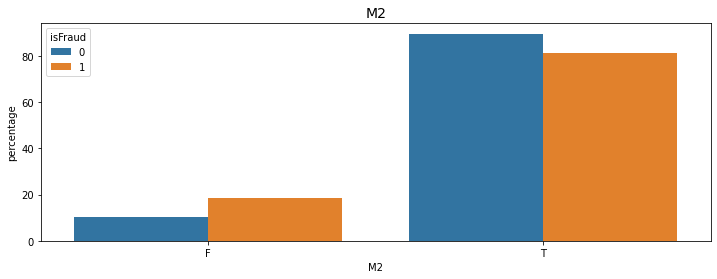

In [33]:
df_M2 = col_percentage('M2')
plt.figure(figsize=(12,4))
sb.barplot(x='M2',y='percentage',hue='isFraud',data=df_M2)
plt.title('M2', fontsize=14)
plt.show()

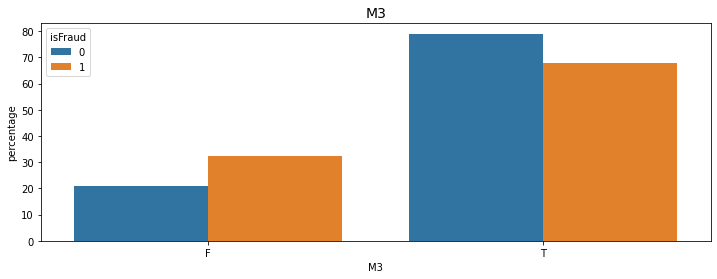

In [34]:
df_M3 = col_percentage('M3')
plt.figure(figsize=(12,4))
sb.barplot(x='M3',y='percentage',hue='isFraud',data=df_M3)
plt.title('M3', fontsize=14)
plt.show()

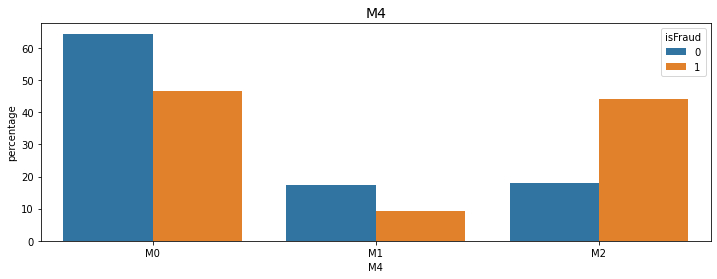

In [35]:
df_M4 = col_percentage('M4')
plt.figure(figsize=(12,4))
sb.barplot(x='M4',y='percentage',hue='isFraud',data=df_M4)
plt.title('M4', fontsize=14)
plt.show()

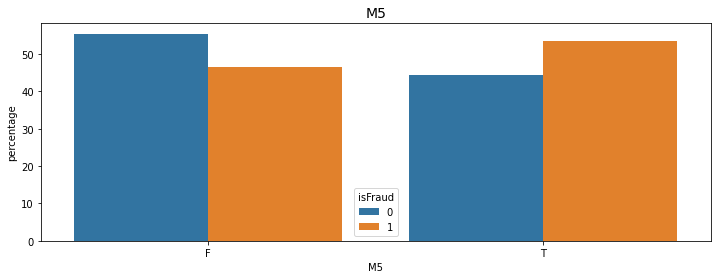

In [36]:
df_M5 = col_percentage('M5')
plt.figure(figsize=(12,4))
sb.barplot(x='M5',y='percentage',hue='isFraud',data=df_M5)
plt.title('M5', fontsize=14)
plt.show()

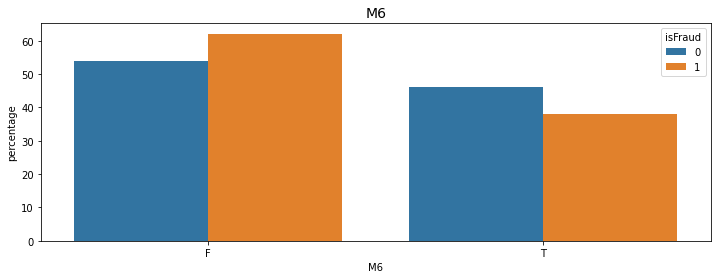

In [37]:
df_M6 = col_percentage('M6')
plt.figure(figsize=(12,4))
sb.barplot(x='M6',y='percentage',hue='isFraud',data=df_M6)
plt.title('M6', fontsize=14)
plt.show()

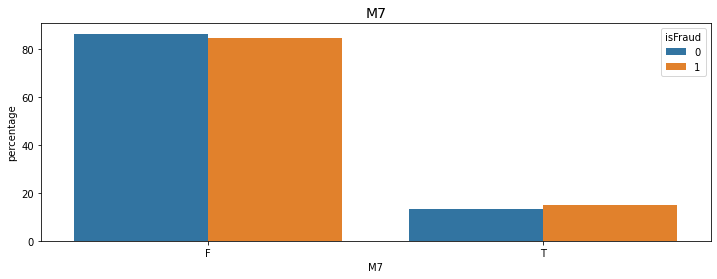

In [38]:
df_M7 = col_percentage('M7')
plt.figure(figsize=(12,4))
sb.barplot(x='M7',y='percentage',hue='isFraud',data=df_M7)
plt.title('M7', fontsize=14)
plt.show()

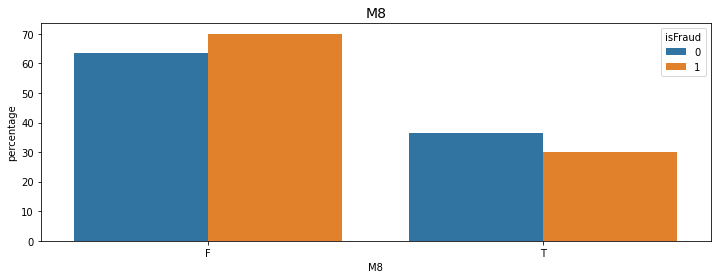

In [39]:
df_M8 = col_percentage('M8')
plt.figure(figsize=(12,4))
sb.barplot(x='M8',y='percentage',hue='isFraud',data=df_M8)
plt.title('M8', fontsize=14)
plt.show()

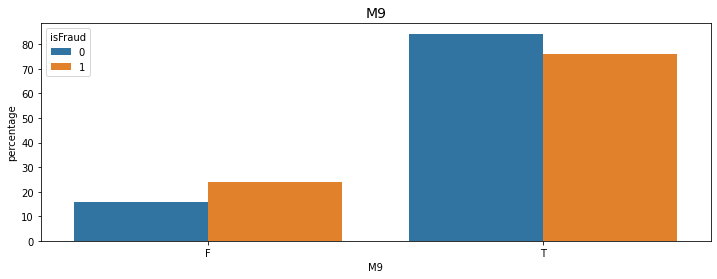

In [40]:
df_M9 = col_percentage('M9')
plt.figure(figsize=(12,4))
sb.barplot(x='M9',y='percentage',hue='isFraud',data=df_M9)
plt.title('M9', fontsize=14)
plt.show()

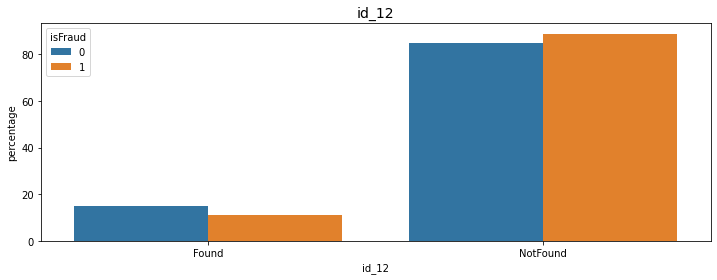

In [41]:
df_id12 = col_percentage('id_12')
plt.figure(figsize=(12,4))
sb.barplot(x='id_12',y='percentage',hue='isFraud',data=df_id12)
plt.title('id_12', fontsize=14)
plt.show()

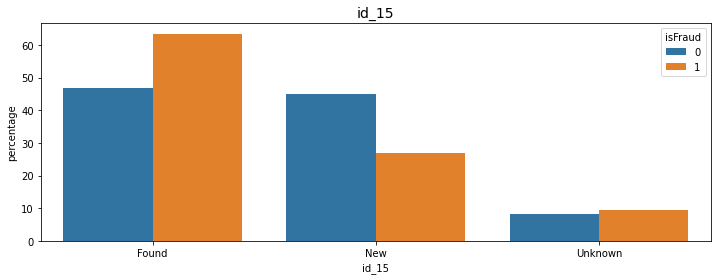

In [42]:
df_id15 = col_percentage('id_15')
plt.figure(figsize=(12,4))
sb.barplot(x='id_15',y='percentage',hue='isFraud',data=df_id15)
plt.title('id_15', fontsize=14)
plt.show()

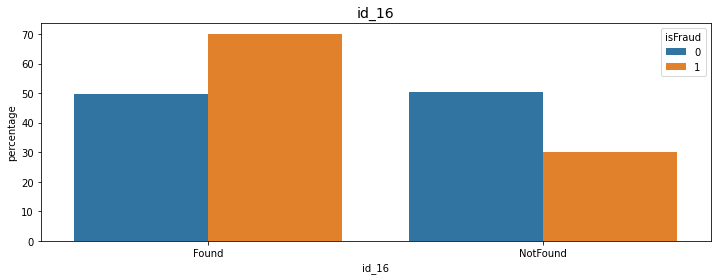

In [43]:
df_id16 = col_percentage('id_16')
plt.figure(figsize=(12,4))
sb.barplot(x='id_16',y='percentage',hue='isFraud',data=df_id16)
plt.title('id_16', fontsize=14)
plt.show()

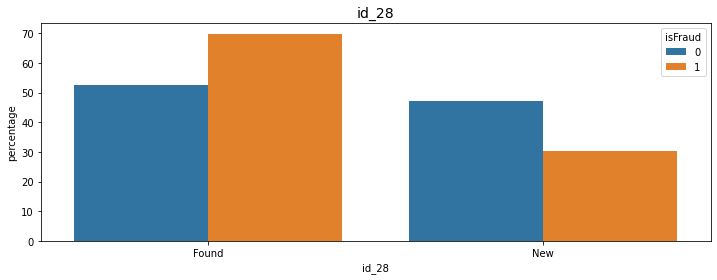

In [44]:
df_id28 = col_percentage('id_28')
plt.figure(figsize=(12,4))
sb.barplot(x='id_28',y='percentage',hue='isFraud',data=df_id28)
plt.title('id_28', fontsize=14)
plt.show()

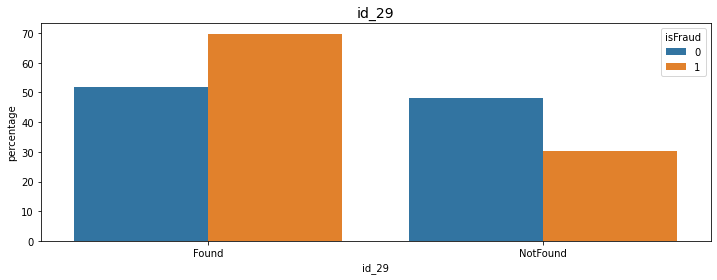

In [45]:
df_id29 = col_percentage('id_29')
plt.figure(figsize=(12,4))
sb.barplot(x='id_29',y='percentage',hue='isFraud',data=df_id29)
plt.title('id_29', fontsize=14)
plt.show()

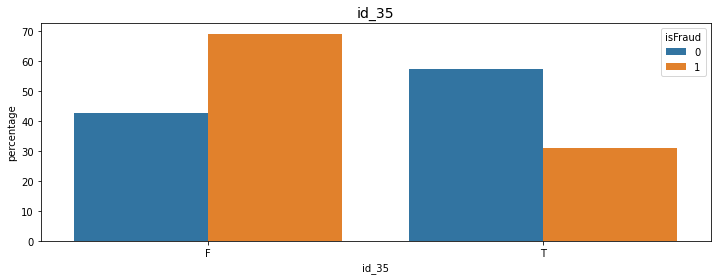

In [46]:
df_id35 = col_percentage('id_35')
plt.figure(figsize=(12,4))
sb.barplot(x='id_35',y='percentage',hue='isFraud',data=df_id35)
plt.title('id_35', fontsize=14)
plt.show()

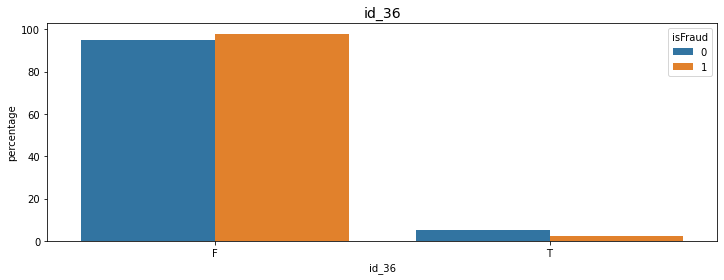

In [47]:
df_id36 = col_percentage('id_36')
plt.figure(figsize=(12,4))
sb.barplot(x='id_36',y='percentage',hue='isFraud',data=df_id36)
plt.title('id_36', fontsize=14)
plt.show()

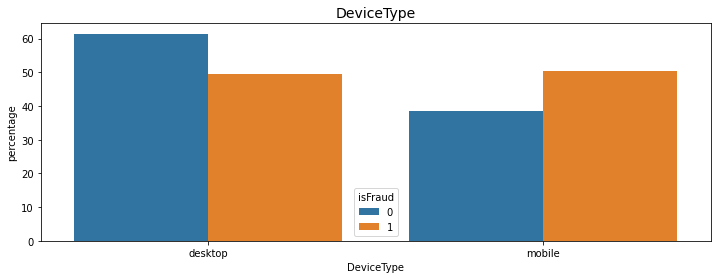

In [48]:
df_devicetype = col_percentage('DeviceType')
plt.figure(figsize=(12,4))
sb.barplot(x='DeviceType',y='percentage',hue='isFraud',data=df_devicetype)
plt.title('DeviceType', fontsize=14)
plt.show()

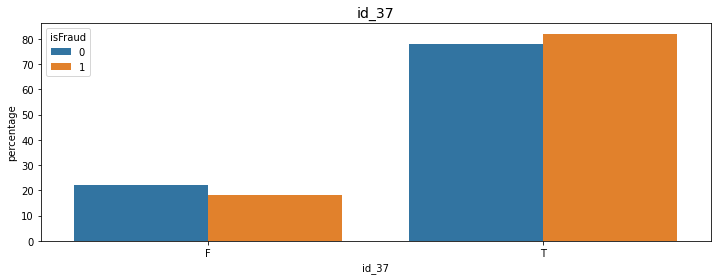

In [49]:
df_id37 = col_percentage('id_37')
plt.figure(figsize=(12,4))
sb.barplot(x='id_37',y='percentage',hue='isFraud',data=df_id37)
plt.title('id_37', fontsize=14)
plt.show()

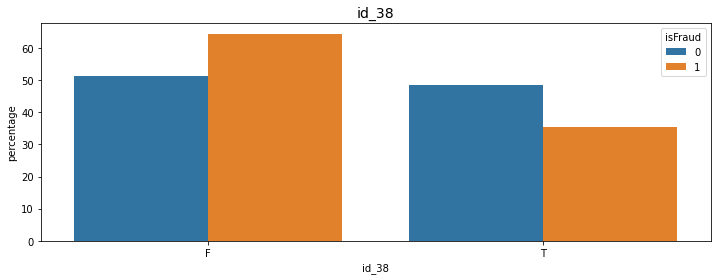

In [50]:
df_id38 = col_percentage('id_38')
plt.figure(figsize=(12,4))
sb.barplot(x='id_38',y='percentage',hue='isFraud',data=df_id38)
plt.title('id_38', fontsize=14)
plt.show()

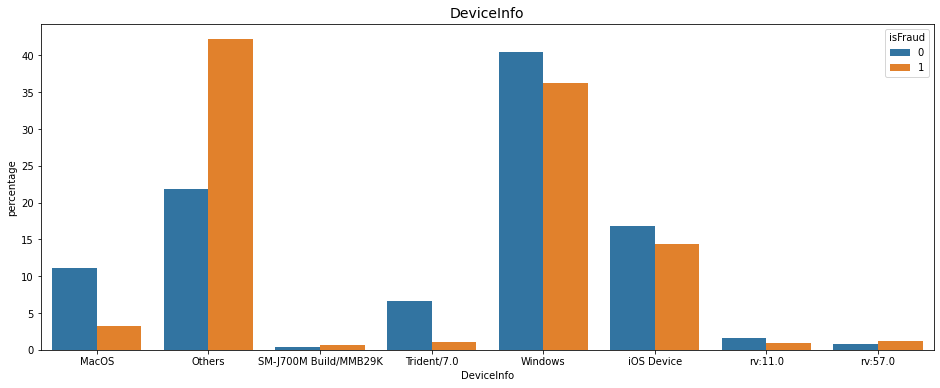

In [51]:
train_full.loc[train_full.DeviceInfo.isin(train_full.DeviceInfo\
                              .value_counts()[train_full.DeviceInfo.value_counts() <= 500 ]\
                              .index), 'DeviceInfo'] = "Others"

df_deviceinfo = col_percentage('DeviceInfo')
plt.figure(figsize=(16,6))
sb.barplot(x='DeviceInfo',y='percentage',hue='isFraud',data=df_deviceinfo)
plt.title('DeviceInfo', fontsize=14)
plt.show()

<Figure size 432x288 with 0 Axes>

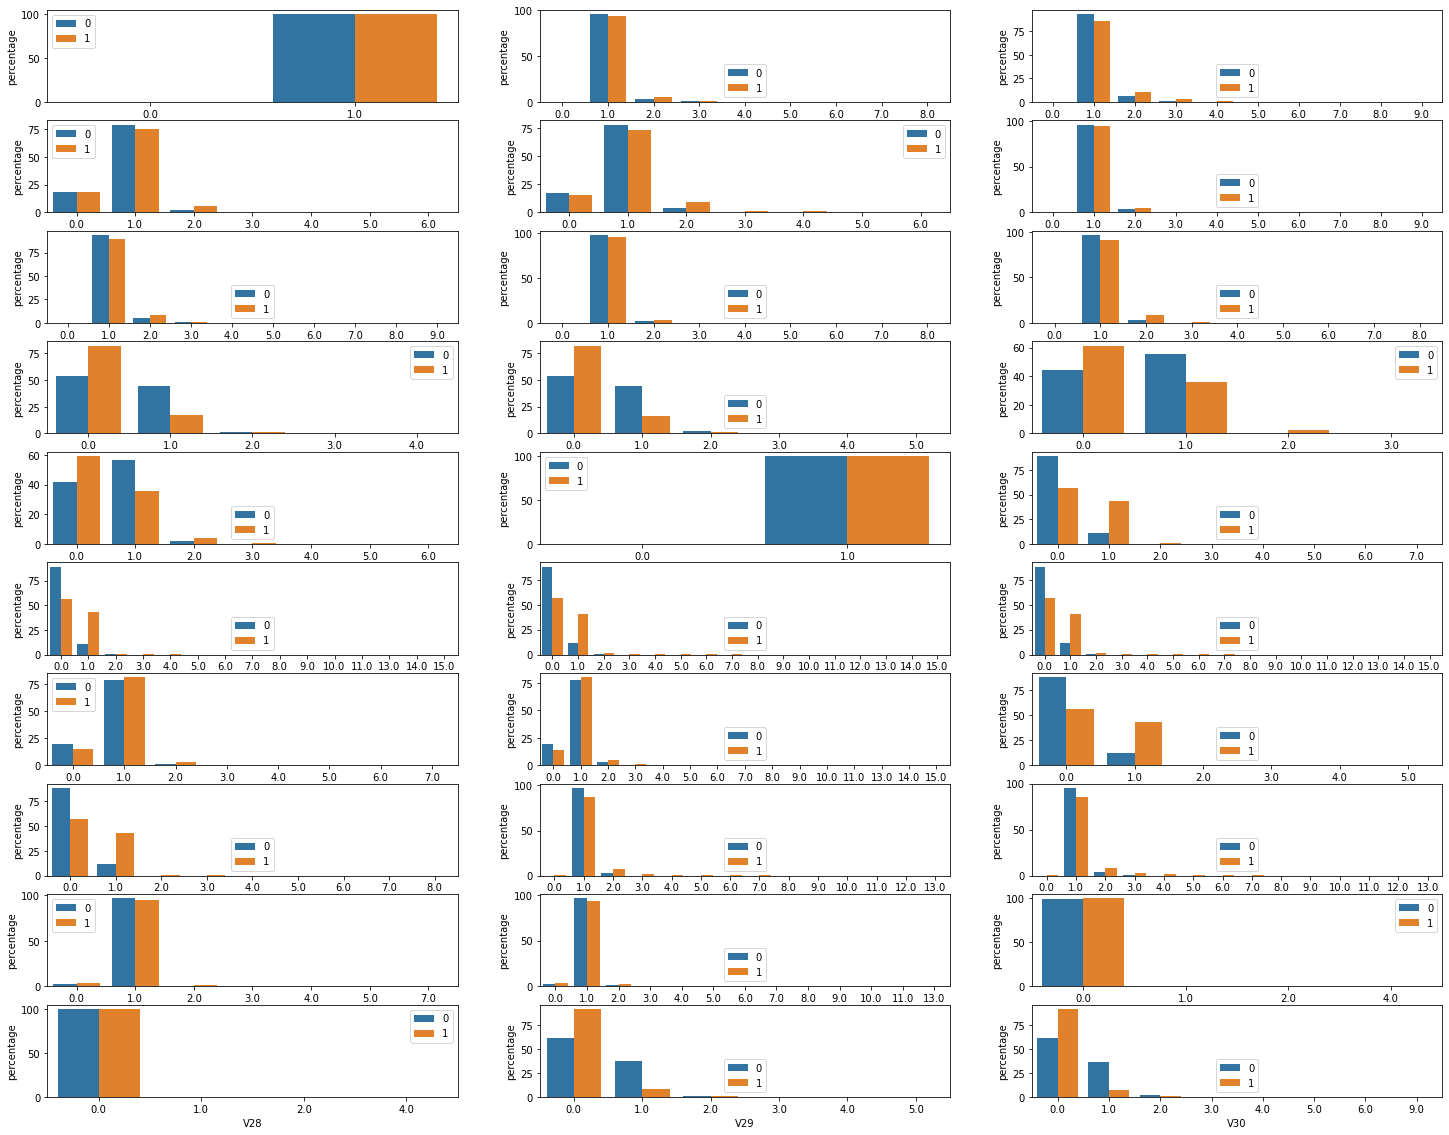

In [52]:
col = ['V'+str(x) for x in range(1,31)]
x = 0
plt.figure()
plt.subplots(10,3,figsize=(25,20))

for feature in col:
    df_vcol = col_percentage(feature)
    x += 1
    plt.subplot(10,3,x)
    sb.barplot(x=feature,y='percentage',hue='isFraud',data=df_vcol)
    plt.xlabel(feature, fontsize=10)
    plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

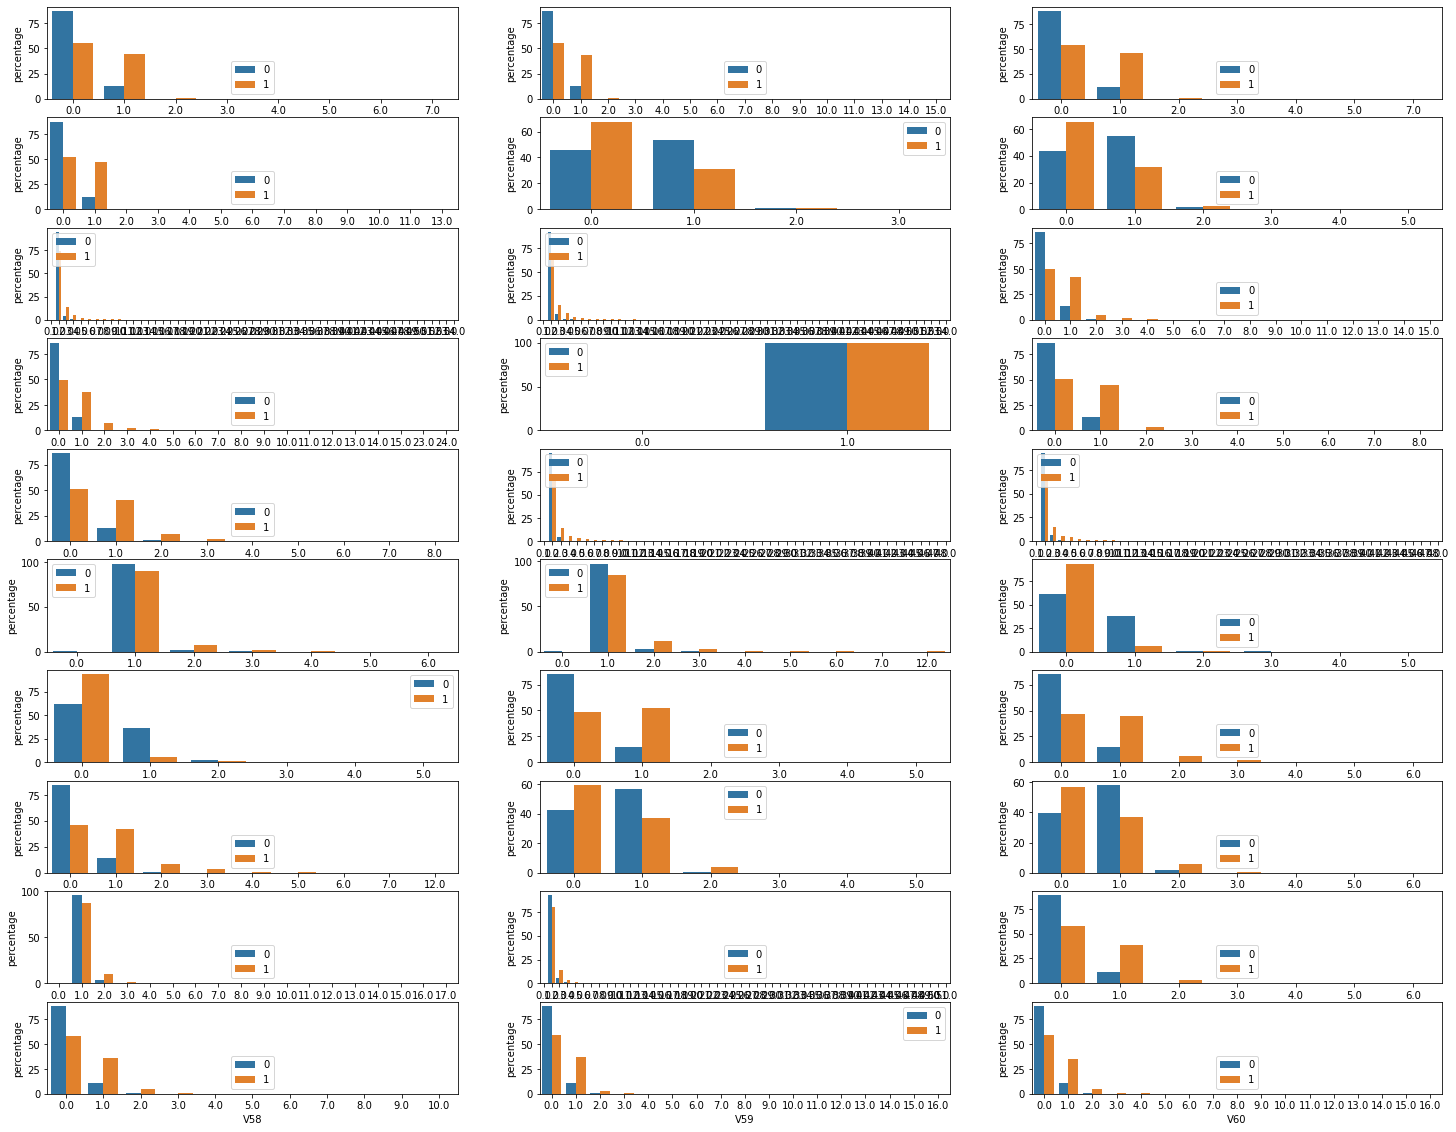

In [53]:
col = ['V'+str(x) for x in range(31,61)]
x = 0
plt.figure()
plt.subplots(10,3,figsize=(25,20))

for feature in col:
    df_vcol = col_percentage(feature)
    x += 1
    plt.subplot(10,3,x)
    sb.barplot(x=feature,y='percentage',hue='isFraud',data=df_vcol)
    plt.xlabel(feature, fontsize=10)
    plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

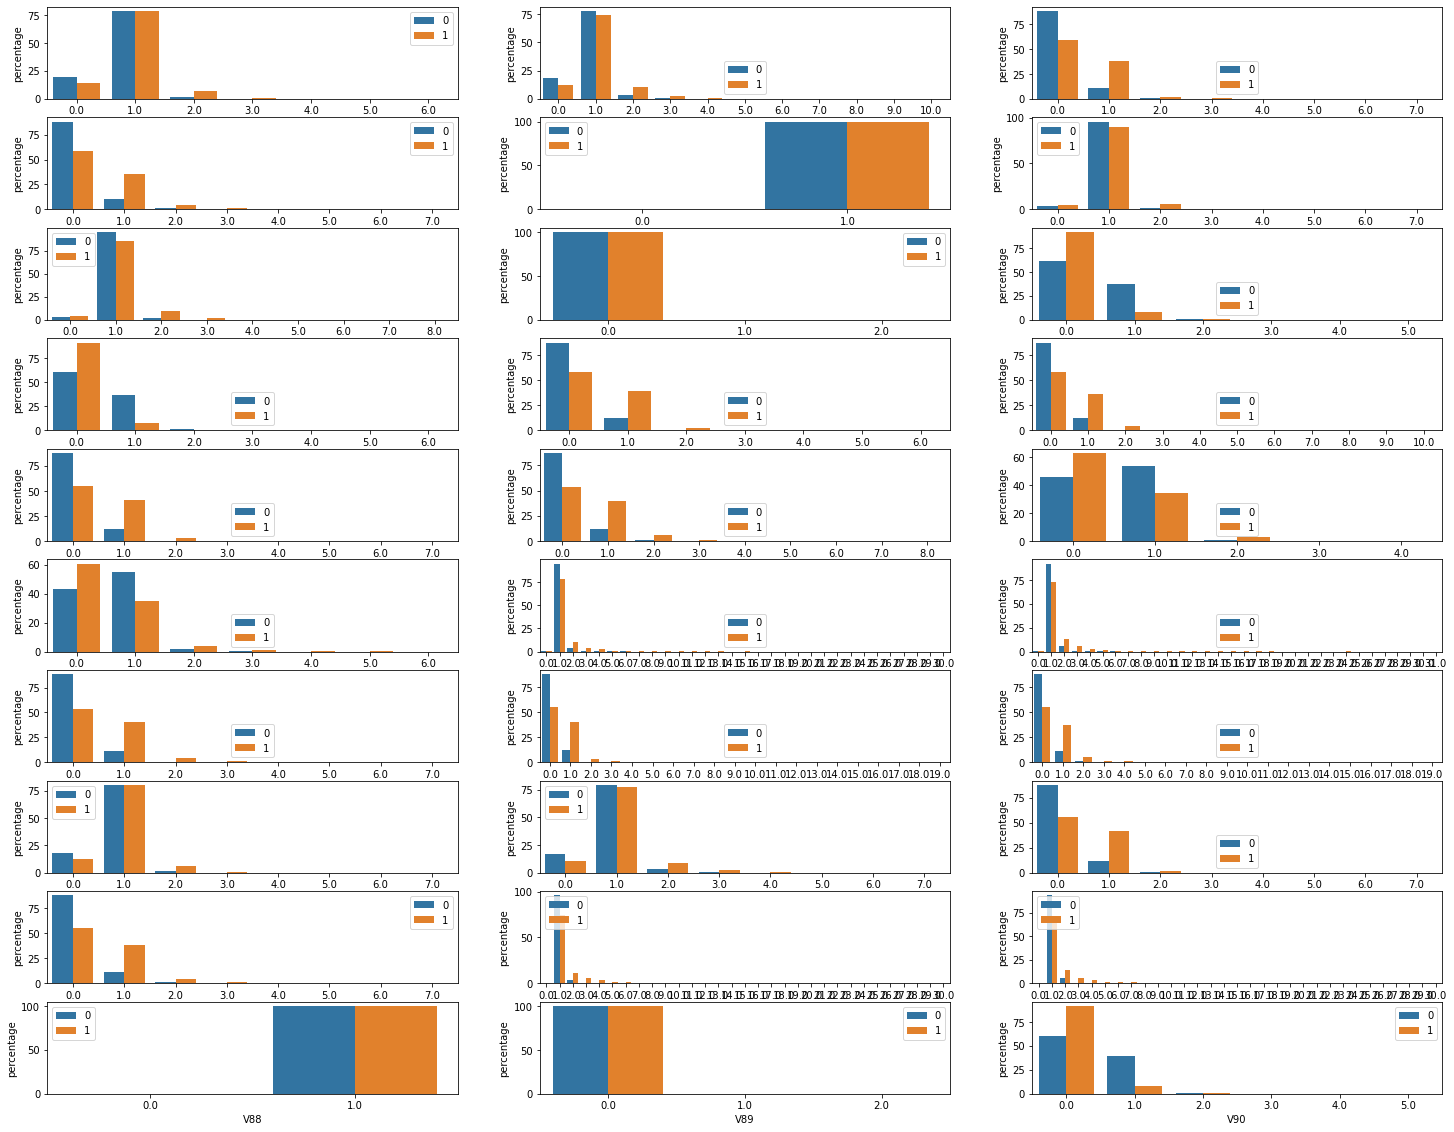

In [54]:
col = ['V'+str(x) for x in range(61,91)]
x = 0
plt.figure()
plt.subplots(10,3,figsize=(25,20))

for feature in col:
    df_vcol = col_percentage(feature)
    x += 1
    plt.subplot(10,3,x)
    sb.barplot(x=feature,y='percentage',hue='isFraud',data=df_vcol)
    plt.xlabel(feature, fontsize=10)
    plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

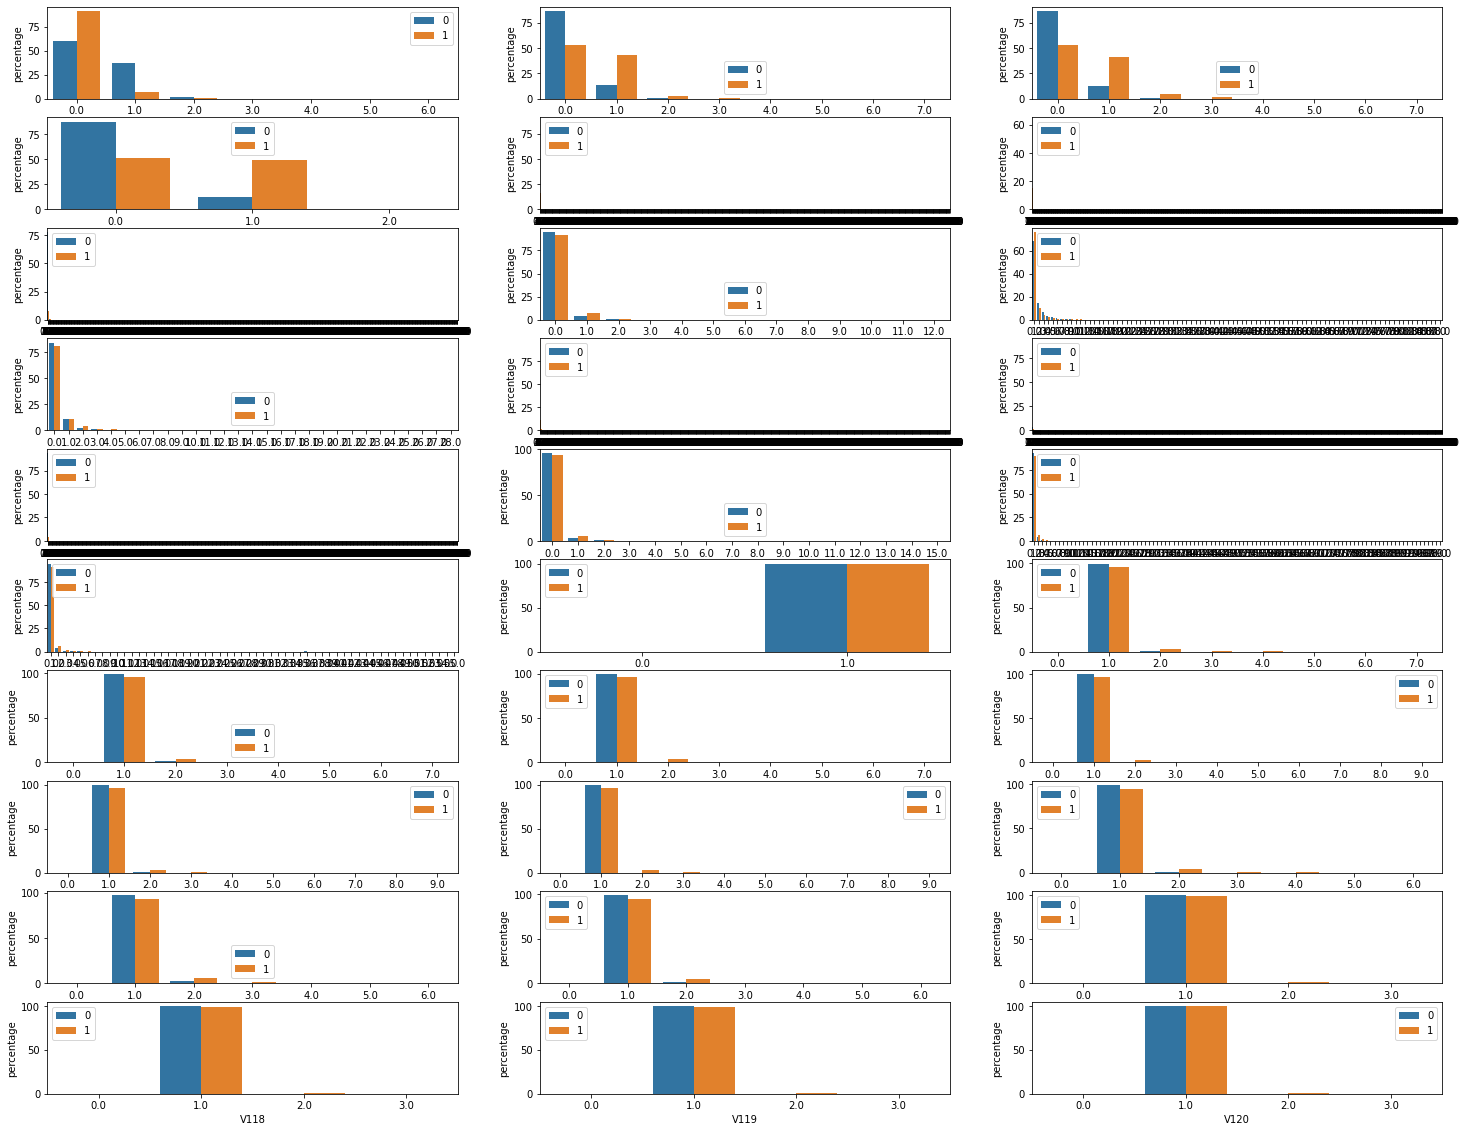

In [55]:
col = ['V'+str(x) for x in range(91,121)]
x = 0
plt.figure()
plt.subplots(10,3,figsize=(25,20))

for feature in col:
    df_vcol = col_percentage(feature)
    x += 1
    plt.subplot(10,3,x)
    sb.barplot(x=feature,y='percentage',hue='isFraud',data=df_vcol)
    plt.xlabel(feature, fontsize=10)
    plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

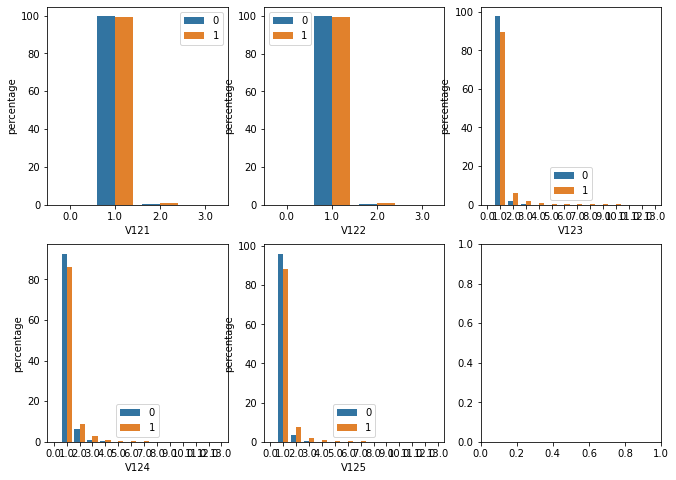

In [56]:
col = ['V'+str(x) for x in range(121,126)]
x = 0
plt.figure()
plt.subplots(2,3,figsize=(11,8))

for feature in col:
    df_vcol = col_percentage(feature)
    x += 1
    plt.subplot(2,3,x)
    sb.barplot(x=feature,y='percentage',hue='isFraud',data=df_vcol)
    plt.xlabel(feature, fontsize=10)
    plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

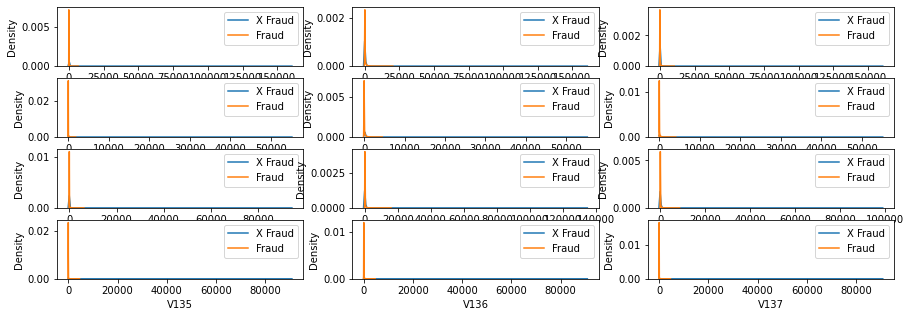

In [57]:
col = ['V'+str(x) for x in range(126,138)]
c0 = train_trans.loc[train_trans["isFraud"] == 0]
c1 = train_trans.loc[train_trans["isFraud"] == 1]
x = 0
plt.figure()
plt.subplots(4,3,figsize=(15,5))

for feature in col:
    x += 1
    plt.subplot(4,3,x)
    sb.kdeplot(data = c0[feature], label = "X Fraud")
    sb.kdeplot(data = c1[feature], label = "Fraud")
    plt.xlabel(feature, fontsize=10)
    plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


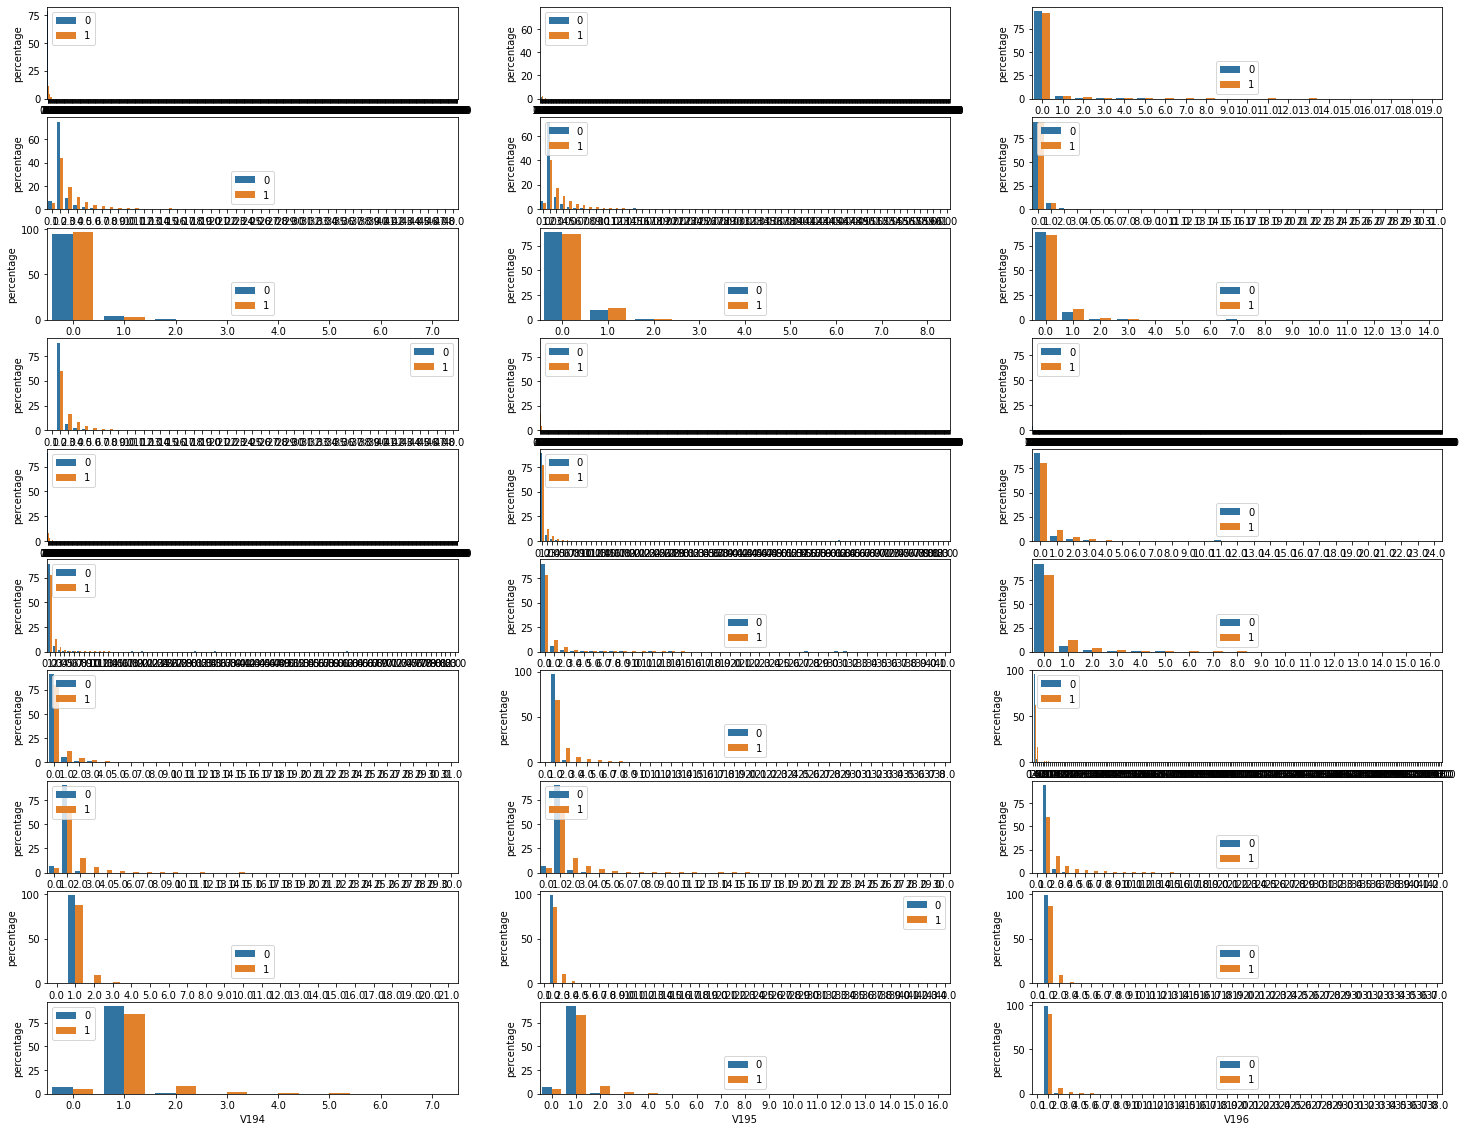

In [58]:
col = ['V'+str(x) for x in range(167,197)]
x = 0
plt.figure()
plt.subplots(10,3,figsize=(25,20))

for feature in col:
    df_vcol = col_percentage(feature)
    x += 1
    plt.subplot(10,3,x)
    sb.barplot(x=feature,y='percentage',hue='isFraud',data=df_vcol)
    plt.xlabel(feature, fontsize=10)
    plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


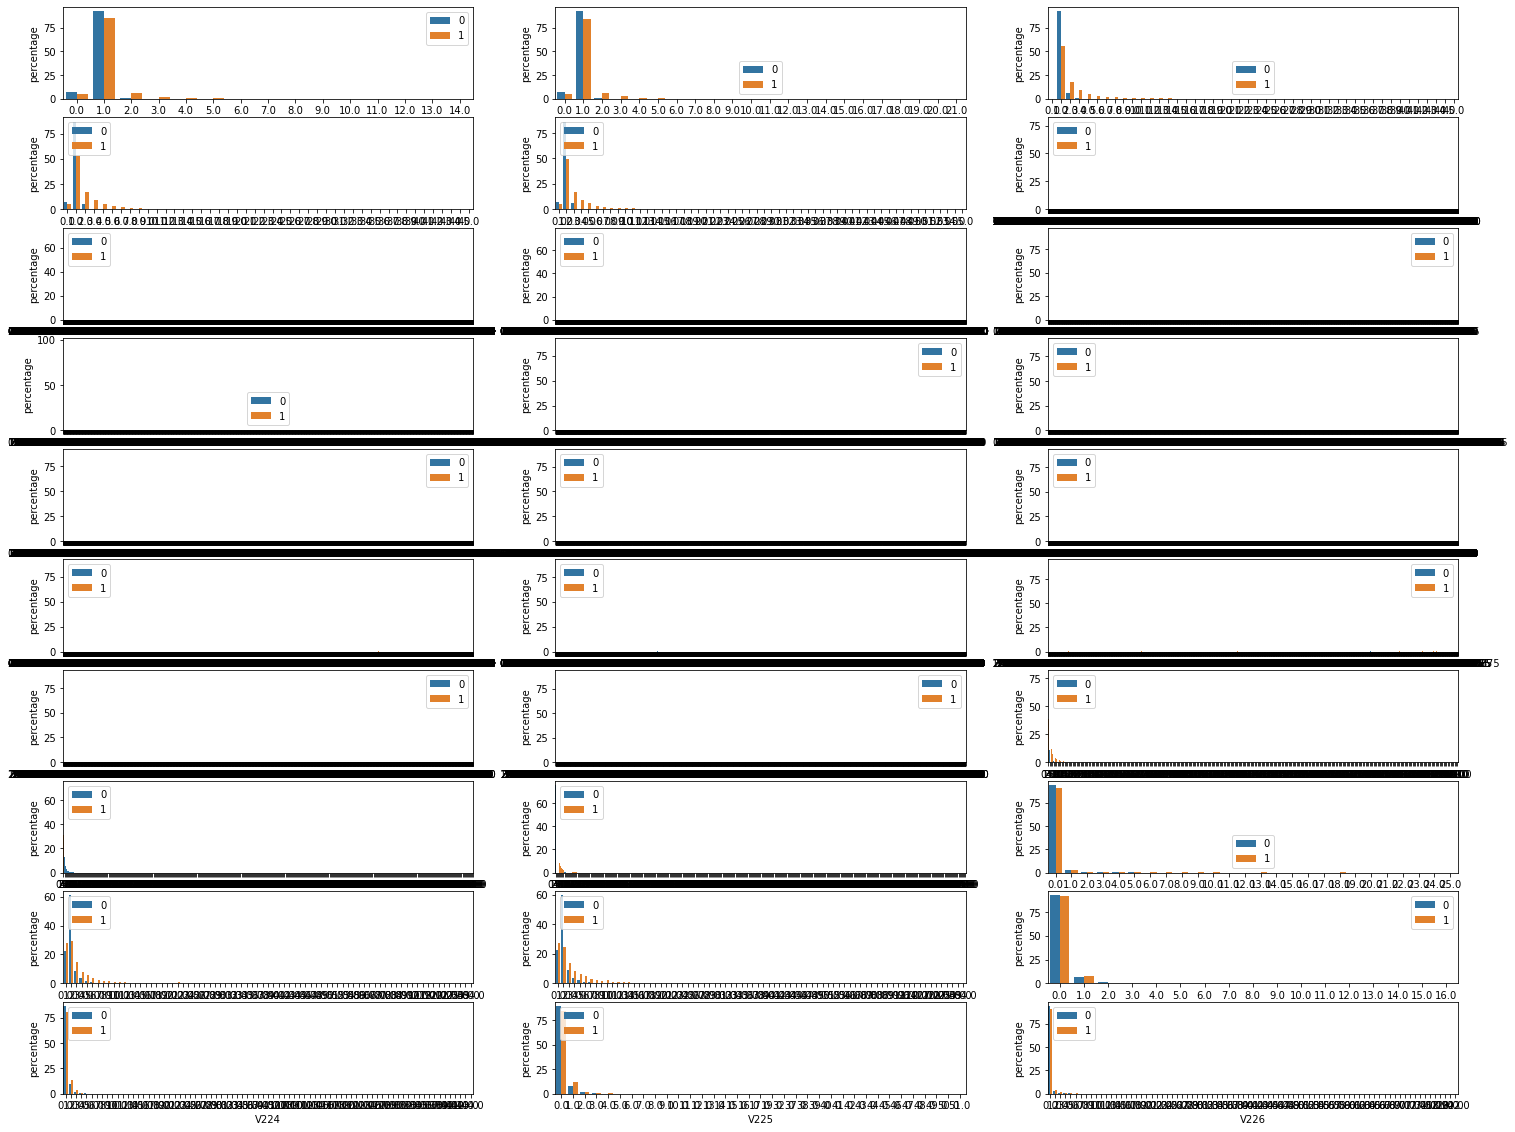

In [59]:
col = ['V'+str(x) for x in range(197,227)]
x = 0
plt.figure()
plt.subplots(10,3,figsize=(25,20))

for feature in col:
    df_vcol = col_percentage(feature)
    x += 1
    plt.subplot(10,3,x)
    sb.barplot(x=feature,y='percentage',hue='isFraud',data=df_vcol)
    plt.xlabel(feature, fontsize=10)
    plt.legend()
plt.show()

In [3]:
#Merge Transaction and Identity table
train_trans2 = pd.read_csv('creditcard_dataset2.csv/train_transaction.csv')
train = train_trans2.merge(train_id, how='left', on='TransactionID') 

In [4]:
#Check for missing values
nf = train["isFraud"].value_counts()[0]
f = train["isFraud"].value_counts()[1]
weight_nf = train['isFraud'].value_counts()[0] / len(train)
weight_f = train['isFraud'].value_counts()[1] / len(train)
print(f"Non-Fraud weight: {weight_nf}")
print(f"Fraud weight: {weight_f}")
print(f"Non Fraud Count: {nf}")
print(f"Fraud Count: {f}")

Non-Fraud weight: 0.9650099908558268
Fraud weight: 0.03499000914417313
Non Fraud Count: 569877
Fraud Count: 20663


In [5]:
train.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
id_36             449555
id_37             449555
id_38             449555
DeviceType        449730
DeviceInfo        471874
Length: 434, dtype: int64

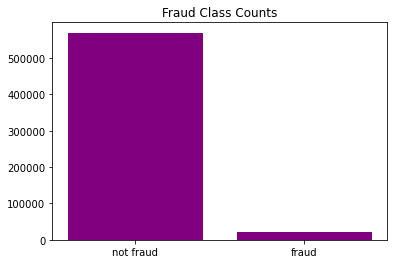

In [6]:
#Fraud Counts
fraud_count = train["isFraud"].value_counts()
plt.figure()
plt.title("Fraud Class Counts")
plt.bar(fraud_count.index,fraud_count.values,color='purple')
plt.xticks([0,1], labels=["not fraud","fraud"])
plt.show()

In [ ]:
del train_id
del train_trans

del train_trans2
del train_full

## Preprocess Data

In [4]:
#Remove high missing value columns
columnsToDelete = []
for col in train.columns:
    if(train[col].isnull().sum()/len(train[col]) >= 0.8):
        print(col, "% NaN:", train[col].isnull().sum()/len(train[col]))
        columnsToDelete.append(col)

dist2 % NaN: 0.9362837403054831
D6 % NaN: 0.8760676668811597
D7 % NaN: 0.9340992989467267
D8 % NaN: 0.8731229044603245
D9 % NaN: 0.8731229044603245
D12 % NaN: 0.8904104717715988
D13 % NaN: 0.8950926270870728
D14 % NaN: 0.8946946862193924
V138 % NaN: 0.8612371727571375
V139 % NaN: 0.8612371727571375
V140 % NaN: 0.8612371727571375
V141 % NaN: 0.8612371727571375
V142 % NaN: 0.8612371727571375
V143 % NaN: 0.8612270125647712
V144 % NaN: 0.8612270125647712
V145 % NaN: 0.8612270125647712
V146 % NaN: 0.8612371727571375
V147 % NaN: 0.8612371727571375
V148 % NaN: 0.8612371727571375
V149 % NaN: 0.8612371727571375
V150 % NaN: 0.8612270125647712
V151 % NaN: 0.8612270125647712
V152 % NaN: 0.8612270125647712
V153 % NaN: 0.8612371727571375
V154 % NaN: 0.8612371727571375
V155 % NaN: 0.8612371727571375
V156 % NaN: 0.8612371727571375
V157 % NaN: 0.8612371727571375
V158 % NaN: 0.8612371727571375
V159 % NaN: 0.8612270125647712
V160 % NaN: 0.8612270125647712
V161 % NaN: 0.8612371727571375
V162 % NaN: 0.8612

In [5]:
train = train.drop(columns=columnsToDelete)

In [6]:
v_columns = []
for col in ['V'+str(x) for x in range(1,340)]:
    if col in train.columns:
        v_columns.append(col)

In [7]:
cat_label_features = ["card1","card2","card3","card5", "addr1", "addr2", "id_13","id_17","id_19","id_20","id_31","DeviceInfo"]
num_features = []
cat_onehot_features = ["ProductCD","card4","card6", "M1","M2","M3","M4","M5","M6","M7","M8","M9","id_12","id_15",
                      "id_16","id_28","id_29","id_35","id_36","id_37","id_38","DeviceType","P_emaildomain",
                       "R_emaildomain"]
for col in train.columns:
    if col not in cat_label_features and col not in v_columns and col not in cat_onehot_features:
        num_features.append(col)
num_features.remove('isFraud')
num_features.remove('TransactionID')

print(len(cat_onehot_features))
print(len(cat_label_features))
print(len(num_features))

24
12
30


In [8]:
emails = {'gmail': 'google', 'att.net': 'att', 'twc.com': 'spectrum', 'scranton.edu': 'other', 'optonline.net': 'other',
          'hotmail.co.uk': 'microsoft', 'comcast.net': 'other', 'yahoo.com.mx': 'yahoo', 'yahoo.fr': 'yahoo',
          'yahoo.es': 'yahoo', 'charter.net': 'spectrum', 'live.com': 'microsoft', 'aim.com': 'aol', 'hotmail.de': 'microsoft',
          'centurylink.net': 'centurylink', 'gmail.com': 'google', 'me.com': 'apple', 'earthlink.net': 'other', 
          'gmx.de': 'other', 'web.de': 'other', 'cfl.rr.com': 'other', 'hotmail.com': 'microsoft', 'protonmail.com': 'other',
          'hotmail.fr': 'microsoft', 'windstream.net': 'other', 'outlook.es': 'microsoft', 'yahoo.co.jp': 'yahoo',
          'yahoo.de': 'yahoo', 'servicios-ta.com': 'other', 'netzero.net': 'other', 'suddenlink.net': 'other',
          'roadrunner.com': 'other', 'sc.rr.com': 'other', 'live.fr': 'microsoft', 'verizon.net': 'yahoo',
          'msn.com': 'microsoft', 'q.com': 'centurylink', 'prodigy.net.mx': 'att', 'frontier.com': 'yahoo',
          'anonymous.com': 'other', 'rocketmail.com': 'yahoo', 'sbcglobal.net': 'att', 'frontiernet.net': 'yahoo',
          'ymail.com': 'yahoo', 'outlook.com': 'microsoft', 'mail.com': 'other', 'bellsouth.net': 'other',
          'embarqmail.com': 'centurylink', 'cableone.net': 'other', 'hotmail.es': 'microsoft', 'mac.com': 'apple',
          'yahoo.co.uk': 'yahoo', 'netzero.com': 'other', 'yahoo.com': 'yahoo', 'live.com.mx': 'microsoft', 'ptd.net': 'other',
          'cox.net': 'other', 'aol.com': 'aol', 'juno.com': 'other', 'icloud.com': 'apple'}

for c in ['P_emaildomain', 'R_emaildomain']:
    train[c] = train[c].map(emails)

In [9]:
train["new_browser"] = np.zeros(train.shape[0])

def setBinaryBrowser(df):
    df.loc[df["id_31"]=="samsung browser 7.0",'new_browser']=1
    df.loc[df["id_31"]=="opera 53.0",'new_browser']=1
    df.loc[df["id_31"]=="mobile safari 10.0",'new_browser']=1
    df.loc[df["id_31"]=="google search application 49.0",'new_browser']=1
    df.loc[df["id_31"]=="firefox 60.0",'new_browser']=1
    df.loc[df["id_31"]=="edge 17.0",'new_browser']=1
    df.loc[df["id_31"]=="chrome 69.0",'new_browser']=1
    df.loc[df["id_31"]=="chrome 67.0 for android",'new_browser']=1
    df.loc[df["id_31"]=="chrome 63.0 for android",'new_browser']=1
    df.loc[df["id_31"]=="chrome 63.0 for ios",'new_browser']=1
    df.loc[df["id_31"]=="chrome 64.0",'new_browser']=1
    df.loc[df["id_31"]=="chrome 64.0 for android",'new_browser']=1
    df.loc[df["id_31"]=="chrome 64.0 for ios",'new_browser']=1
    df.loc[df["id_31"]=="chrome 65.0",'new_browser']=1
    df.loc[df["id_31"]=="chrome 65.0 for android",'new_browser']=1
    df.loc[df["id_31"]=="chrome 65.0 for ios",'new_browser']=1
    df.loc[df["id_31"]=="chrome 66.0",'new_browser']=1
    df.loc[df["id_31"]=="chrome 66.0 for android",'new_browser']=1
    df.loc[df["id_31"]=="chrome 66.0 for ios",'new_browser']=1
    return df

train = setBinaryBrowser(train)
cat_label_features.remove('id_31')
cat_onehot_features.append('new_browser')
train = train.drop(columns='id_31')

In [10]:
def transform_hour(df, col='TransactionDT'):
    hours = df[col] / (3600)        
    hours = np.floor(hours) % 24
    return hours

train['hours'] = transform_hour(train)
num_features.remove('TransactionDT')
cat_onehot_features.append('hours')

In [11]:
num_transformer = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())  
    ]
)

v_transformer = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

cat_transformer = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder())
    ]
)

preprocessor_c = ColumnTransformer(
    transformers = [
        ('cat', cat_transformer, cat_onehot_features)
    ]
)

preprocessor_v = ColumnTransformer(
    transformers = [
        ('v', v_transformer, v_columns)
    ]
)

preprocessor_num = ColumnTransformer(
    transformers = [
        ('num', num_transformer, num_features)
    ]
)

In [12]:
for col in cat_label_features:
    train[col] = train[col].fillna(train[col].mode()[0])

le = LabelEncoder()
train[cat_label_features] = train[["card1","card2","card3","card5", "addr1", "addr2",
                                   "id_13","id_17","id_19","id_20","DeviceInfo"]].apply(le.fit_transform)

In [13]:
from sklearn.model_selection import train_test_split
y = train.isFraud.values
x_train, x_test, y_train, y_test = train_test_split(train, y, stratify = y, test_size = 0.25, random_state = 5)

In [14]:
x_train_cat_label = x_train[cat_label_features]
x_test_cat_label = x_test[cat_label_features]
mms = MinMaxScaler()
x_train_cat_label = mms.fit_transform(x_train_cat_label)
x_test_cat_label = mms.transform(x_test_cat_label)
print(x_train_cat_label.shape)

(442905, 11)


In [15]:
preprocessor_c.fit(x_train[cat_onehot_features])
x_train_cat_onehot = preprocessor_c.transform(x_train[cat_onehot_features])
x_test_cat_onehot = preprocessor_c.transform(x_test[cat_onehot_features])

In [16]:
x_train_cat_onehot = x_train_cat_onehot.toarray()
x_test_cat_onehot = x_test_cat_onehot.toarray()
print(x_train_cat_onehot.shape)

(442905, 97)


In [17]:
preprocessor_v.fit(x_train[v_columns])
x_train_v = preprocessor_v.transform(x_train[v_columns])
x_test_v = preprocessor_v.transform(x_test[v_columns])
print(x_train_v.shape)

(442905, 292)


In [18]:
#Dimension reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
x_train_v = pca.fit_transform(x_train_v)
x_test_v = pca.transform(x_test_v)
var_explained = pca.explained_variance_ratio_.sum()
print(x_train_v.shape)

(442905, 85)


In [19]:
preprocessor_num.fit(x_train[num_features])
x_train_num = preprocessor_num.transform(x_train[num_features])
x_test_num = preprocessor_num.transform(x_test[num_features])
print(x_train_num.shape)
print(x_test_num.shape)

(442905, 29)
(147635, 29)


In [20]:
x_train_num = x_train_num.astype('float32')
x_test_num = x_test_num.astype('float32')
x_train = np.concatenate((x_train_num, x_train_cat_label, x_train_v, x_train_cat_onehot), axis = 1)
x_test = np.concatenate((x_test_num, x_test_cat_label, x_test_v, x_test_cat_onehot), axis = 1)
print(x_train.shape)
print(x_test.shape)

(442905, 222)
(147635, 222)


In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, precision_score, matthews_corrcoef, roc_auc_score


def print_classification_result(true, predict):
    print(f"Accuracy Score\n: {accuracy_score(true, predict) * 100:.2f}%")
    print(f"Confusion Matrix: \n {confusion_matrix(true, predict)}\n")
    print(f"MCC_Score\n:{matthews_corrcoef(true, predict)}\n")
    print(f"f1_score: \n {f1_score(true, predict)}\n")
    print(f"recall_score: \n {recall_score(true, predict)}\n")
    print(f"Precision_Score\n:{precision_score(true, predict)}")

def print_cross_val_result(cv):
    print(f"Accuracy Score: \n{cv['test_accuracy'].mean()}\n")
    print(f"f1_score: \n{cv['test_f1'].mean()}\n")
    print(f"recall_score: \n{cv['test_recall'].mean()}\n")
    print(f"Precision_Score: \n{cv['test_precision'].mean()}")

## Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
randfclassifier = RandomForestClassifier(n_estimators = 300, criterion = "gini", bootstrap = False)
randfclassifier.fit(x_train, y_train)
y_test_pred_randf = randfclassifier.predict(x_test)
print_classification_result(y_test, y_test_pred_randf)

Accuracy Score
: 98.02%
Confusion Matrix: 
 [[142268    201]
 [  2722   2444]]

MCC_Score
:0.6534393153738409

f1_score: 
 0.625784150556907

recall_score: 
 0.473093302361595

Precision_Score
:0.924007561436673


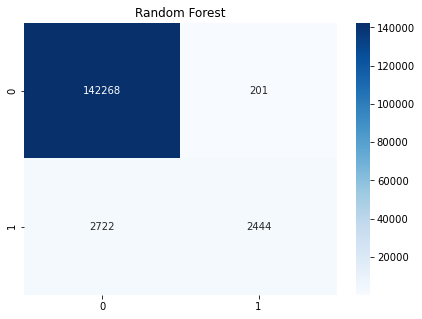

In [33]:
plt.figure(figsize = (7,5))
cm = sb.heatmap(confusion_matrix(y_test, y_test_pred_randf), annot=True, cmap='Blues', fmt='d')
cm.set_title('Random Forest')
plt.show()

In [24]:
randfclassifier = RandomForestClassifier(n_estimators = 100, criterion = "gini")
cv = cross_validate(randfclassifier, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [25]:
print_cross_val_result(cv)

Accuracy Score: 
0.978067531411928

f1_score: 
0.563134293837454

recall_score: 
0.4040784436186491

Precision_Score: 
0.9288841036539308


In [26]:
randfclassifier = RandomForestClassifier(n_estimators = 200, criterion = "gini")
cv = cross_validate(randfclassifier, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [27]:
print_cross_val_result(cv)

Accuracy Score: 
0.9782210632076855

f1_score: 
0.5668974037486165

recall_score: 
0.40743401097128107

Precision_Score: 
0.9317050539278853


In [28]:
randfclassifier = RandomForestClassifier(n_estimators = 300, criterion = "gini")
cv = cross_validate(randfclassifier, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [29]:
print_cross_val_result(cv)

Accuracy Score: 
0.9782346101308408

f1_score: 
0.5670747035822113

recall_score: 
0.407498797739125

Precision_Score: 
0.932379465998773


In [30]:
randfclassifier = RandomForestClassifier(n_estimators = 100, criterion = "gini", bootstrap = False)
cv = cross_validate(randfclassifier, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [31]:
print_cross_val_result(cv)

Accuracy Score: 
0.9793906142400741

f1_score: 
0.6044237522210714

recall_score: 
0.45015216146727877

Precision_Score: 
0.9199756755213974


## K Nearest Neighbor Classifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, p = 2, metric = "minkowski")
knn.fit(x_train, y_train)
y_test_pred_KNN = knn.predict(x_test)
print_classification_result(y_test, y_test_pred_KNN)

Accuracy Score
: 97.68%
Confusion Matrix: 
 [[141995    474]
 [  2944   2222]]

MCC_Score
:0.5857362169586917

f1_score: 
 0.5652505723734419

recall_score: 
 0.43012001548586914

Precision_Score
:0.8241839762611276


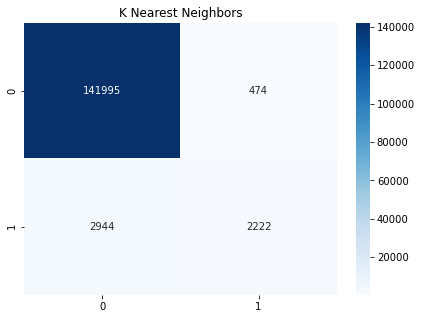

In [31]:
plt.figure(figsize = (7,5))
cm = sb.heatmap(confusion_matrix(y_test, y_test_pred_KNN), annot=True, cmap='Blues', fmt='d')
cm.set_title('K Nearest Neighbors')
plt.show()

In [32]:
knn = KNeighborsClassifier(n_neighbors = 4, p = 2, metric = "minkowski")
cv = cross_validate(knn, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [33]:
print_cross_val_result(cv)

Accuracy Score: 
0.975981305246046

f1_score: 
0.5156560574548404

recall_score: 
0.3654906577564042

Precision_Score: 
0.8756230967629074


In [26]:
knn = KNeighborsClassifier(n_neighbors = 5, p = 2, metric = "minkowski")
cv = cross_validate(knn, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [27]:
print_cross_val_result(cv)

Accuracy Score: 
0.9760806493491831

f1_score: 
0.5404336529745523

recall_score: 
0.40201398994472715

Precision_Score: 
0.8244114782661821


In [22]:
knn = KNeighborsClassifier(n_neighbors = 6, p = 2, metric = "minkowski")
cv = cross_validate(knn, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [23]:
print_cross_val_result(cv)

Accuracy Score: 
0.9754055610119551

f1_score: 
0.49459550004549013

recall_score: 
0.3440027896615974

Precision_Score: 
0.8800081246554274


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5, p = 1, metric = "minkowski")
cv = cross_validate(knn, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [ ]:
print_cross_val_result(cv)

## Naive Bayes Classifier

In [24]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_test_pred_NB = nb.predict(x_test)
print_classification_result(y_test, y_test_pred_NB)

Accuracy Score
: 83.16%
Confusion Matrix: 
 [[119871  22598]
 [  2264   2902]]

MCC_Score
:0.19597267337644694

f1_score: 
 0.18926498402139177

recall_score: 
 0.5617499032133179

Precision_Score
:0.11380392156862745


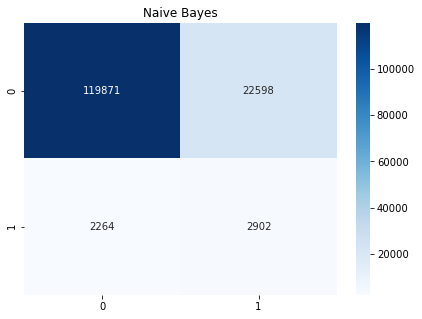

In [25]:
plt.figure(figsize = (7,5))
cm = sb.heatmap(confusion_matrix(y_test, y_test_pred_NB), annot=True, cmap='Blues', fmt='d')
cm.set_title('Naive Bayes')
plt.show()

In [26]:
nb = GaussianNB()
cv = cross_validate(nb, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)
print_cross_val_result(cv)

Accuracy Score: 
0.8311466341540511

f1_score: 
0.18999813726990866

recall_score: 
0.5657241357774101

Precision_Score: 
0.11419384242660888


## Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = "gini", min_samples_leaf = 10)
tree.fit(x_train, y_train)
y_test_pred_tree = tree.predict(x_test)
print_classification_result(y_test, y_test_pred_tree)

Accuracy Score
: 97.32%
Confusion Matrix: 
 [[141452   1017]
 [  2946   2220]]

MCC_Score
:0.5302849036986456

f1_score: 
 0.5283827204569796

recall_score: 
 0.429732868757259

Precision_Score
:0.6858202038924931


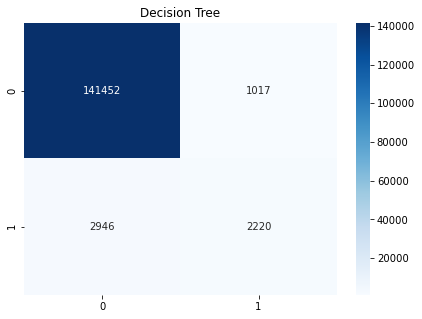

In [39]:
plt.figure(figsize = (7,5))
cm = sb.heatmap(confusion_matrix(y_test, y_test_pred_tree), annot=True, cmap='Blues', fmt='d')
cm.set_title('Decision Tree')
plt.show()

In [29]:
tree = DecisionTreeClassifier(criterion = "entropy")
cv = cross_validate(tree, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [30]:
print_cross_val_result(cv)

Accuracy Score: 
0.9632426818392206

f1_score: 
0.4906865188060337

recall_score: 
0.5060986582560452

Precision_Score: 
0.47628602174494866


In [31]:
tree = DecisionTreeClassifier(criterion = "gini")
cv = cross_validate(tree, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [32]:
print_cross_val_result(cv)

Accuracy Score: 
0.9610142129802103

f1_score: 
0.4794606685677275

recall_score: 
0.5131967023701715

Precision_Score: 
0.4499493925378215


In [49]:
tree = DecisionTreeClassifier(criterion = "gini", splitter = "random")
cv = cross_validate(tree, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [50]:
print_cross_val_result(cv)

Accuracy Score: 
0.9598672401530802

f1_score: 
0.45858202728065506

recall_score: 
0.4857718931184877

Precision_Score: 
0.4343163735453942


In [51]:
tree = DecisionTreeClassifier(criterion = "gini", max_features = "sqrt")
cv = cross_validate(tree, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [52]:
print_cross_val_result(cv)

Accuracy Score: 
0.958708978223321

f1_score: 
0.4348271021330282

recall_score: 
0.4539575721616755

Precision_Score: 
0.4172638854875479


In [47]:
tree = DecisionTreeClassifier(criterion = "gini", max_depth = 65)
cv = cross_validate(tree, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [48]:
print_cross_val_result(cv)

Accuracy Score: 
0.9608561655434009

f1_score: 
0.47783396616152596

recall_score: 
0.5119709167369286

Precision_Score: 
0.44802587707895736


In [53]:
tree = DecisionTreeClassifier(criterion = "gini", min_samples_leaf = 10)
cv = cross_validate(tree, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [54]:
print_cross_val_result(cv)

Accuracy Score: 
0.9722536435578736

f1_score: 
0.5127282466410124

recall_score: 
0.41724250278445696

Precision_Score: 
0.665014362919446


In [22]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = "gini", min_samples_leaf = 15)
cv = cross_validate(tree, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

In [23]:
print_cross_val_result(cv)

Accuracy Score: 
0.972732301509353

f1_score: 
0.5083889041170581

recall_score: 
0.402981711061841

Precision_Score: 
0.6885751213694291


## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=1, class_weight=None, solver="newton-cg")
log.fit(x_train, y_train)
y_test_pred_log = log.predict(x_test)
print_classification_result(y_test, y_test_pred_log)

C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


Accuracy Score
: 97.09%
Confusion Matrix: 
 [[142147    322]
 [  3981   1185]]

MCC_Score
:0.4152194000220363

f1_score: 
 0.35516259553424245

recall_score: 
 0.22938443670150988

Precision_Score
:0.7863304578633046


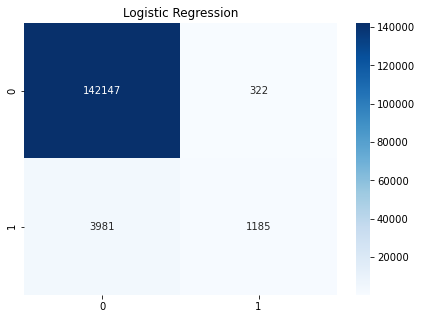

In [25]:
plt.figure(figsize = (7,5))
cm = sb.heatmap(confusion_matrix(y_test, y_test_pred_log), annot=True, cmap='Blues', fmt='d')
cm.set_title('Logistic Regression')
plt.show()

In [26]:
log = LogisticRegression(C=1, class_weight=None)
cv = cross_validate(log, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [27]:
print_cross_val_result(cv)

Accuracy Score: 
0.9709712014991927

f1_score: 
0.35165120719576903

recall_score: 
0.22501202260874997

Precision_Score: 
0.8044434446380034


In [28]:
log = LogisticRegression(C=0.1, class_weight=None)
cv = cross_validate(log, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [29]:
print_cross_val_result(cv)

Accuracy Score: 
0.9709779749607703

f1_score: 
0.35053241607183727

recall_score: 
0.2238504408289875

Precision_Score: 
0.8076194747053466


In [30]:
log = LogisticRegression(C=10, class_weight=None)
cv = cross_validate(log, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [31]:
print_cross_val_result(cv)

Accuracy Score: 
0.9709576545760378

f1_score: 
0.35128498350618675

recall_score: 
0.22475383318240016

Precision_Score: 
0.80393487724686


In [32]:
log = LogisticRegression(C=1, class_weight="balanced")
cv = cross_validate(log, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [33]:
print_cross_val_result(cv)

Accuracy Score: 
0.8191034194691864

f1_score: 
0.22068734363350923

recall_score: 
0.7319481414400066

Precision_Score: 
0.12993255396178913


In [34]:
log = LogisticRegression(C=1, class_weight=None, solver="saga", penalty="l2")
cv = cross_validate(log, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\skle

In [35]:
print_cross_val_result(cv)

Accuracy Score: 
0.9700161434167598

f1_score: 
0.3015440061232009

recall_score: 
0.18500371607906815

Precision_Score: 
0.8154603869494974


In [36]:
log = LogisticRegression(C=1, class_weight=None, solver="saga", penalty="l1")
cv = cross_validate(log, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\skle

In [37]:
print_cross_val_result(cv)

Accuracy Score: 
0.9700184012372857

f1_score: 
0.30148665069871966

recall_score: 
0.1849391999500359

Precision_Score: 
0.8158322870036938


In [22]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=1, class_weight=None, solver="newton-cg", penalty="l2")
cv = cross_validate(log, x_train, y_train, cv=5, 
               scoring=('accuracy','f1','recall','precision'), 
               return_train_score=True)

C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\si

In [23]:
print_cross_val_result(cv)

Accuracy Score: 
0.9712579447059753

f1_score: 
0.36239549273648397

recall_score: 
0.23346530098158613

Precision_Score: 
0.8094720976002268
